### General Packages for Calibration and Concatenation

In [1]:
### for array operations
import numpy as np

### for plotting
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse # Draw ellipse on pictures

### for operations on FITS images
from astropy.io import fits

### statistics functions needed in this tutorial
from scipy import stats
from scipy.stats import norm
from scipy.stats import mode
import scipy as sp

### for changing directory
import os

### for displaying images (not very good but better than nothing)
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.visualization import simple_norm

### for curve fitting
from scipy.optimize import curve_fit

### for auto-completing things in loops
import glob

### Source Extractor for python
import sep

### Don't know what this does but keep it
rcParams['figure.figsize'] = [10., 8.]

### Coordinates and time
from astropy.wcs import WCS
from astropy.time import Time

from itertools import chain

### Packages for Curve Fitting

In [2]:
### General FFT fitting, interpolation
from numpy.fft import fft, ifft

from scipy.interpolate import interp1d    

import math as math
import scipy.special as sp
import scipy.optimize
import pylab as plt

### Lomb-Scargle method
from astropy.timeseries import LombScargle

### Period detection and Identification Pipeline Suite (PIPS)
### https://pips.readthedocs.io/en/latest/index.html#
### https://pypi.org/project/astroPIPS/
### https://arxiv.org/pdf/2107.14223.pdf
import PIPS
from PIPS.resources.sample_RRL import samples

### Create Master Darks and Master Flats

In [3]:
### Directory
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/SCIENCE!')

### Make list of darks
darksList = sorted(glob.glob('dark.0000*.DARK.FIT'))
darksData = [fits.open(filename)[0].data for filename in darksList]

### Create a median of all darks
darksMedian = np.median(darksData,axis=0)

### Write out masterdark
masterDark = fits.PrimaryHDU(darksMedian)
masterDark.writeto('masterDark.fits', overwrite=True)

print("Master Dark Created.")

### Make list of darks
darksListB = sorted(glob.glob('Bflatdark.0000*.DARK.FIT'))
darksDataB = [fits.open(filename)[0].data for filename in darksListB]

### Create a median of all darks
darksMedianB = np.median(darksDataB,axis=0)

### Write out masterdark
masterDarkB = fits.PrimaryHDU(darksMedianB)
masterDarkB.writeto('masterDarkB.fits', overwrite=True)

print("Master Dark Blue Created.")

### Make list of darks
darksListV = sorted(glob.glob('Vflatdark.0000*.DARK.FIT'))
darksDataV = [fits.open(filename)[0].data for filename in darksListV]

### Create a median of all darks
darksMedianV = np.median(darksDataV,axis=0)

### Write out masterdark
masterDarkV = fits.PrimaryHDU(darksMedianV)
masterDarkV.writeto('masterDarkV.fits', overwrite=True)

print("Master Dark Visible Created.")

### First, subtract master dark B or V from each flat
### Create a median of all those flats, then divide median by the mode of that median image to make normalized median flat.

for i in glob.glob('C:/Users/19294/Desktop/JUPYTER NOTEBOOKS/Lab 4/SCIENCE!/Bflat/' + '*.FIT'):
    hduflatB = fits.open(i)
    imageflatB = hduflatB[0].data
    
    calibflatB = imageflatB - darksMedianB
    
    ### Annoying string manipulation to get file number
    preNumberB = i.replace("C:/Users/19294/Desktop/JUPYTER NOTEBOOKS/Lab 4/SCIENCE!/Bflat\Bflat.","")
    numberB = preNumberB.replace(".FIT", "")
    
    calibflatimageB = fits.PrimaryHDU(calibflatB)
    calibflatimageB.writeto('calibflatB.' + numberB + '.fits', overwrite = 'overwrite')
print('Calib Flats Blue Created.')

### Make list of flats
flatsListB = sorted(glob.glob('calibflatB.0000*.fits'))
flatsDataB = [fits.open(filename)[0].data for filename in flatsListB]

### Create a median of all flats
flatsMedianB = np.median(flatsDataB,axis=0) / stats.mode(np.median(flatsDataB,axis=0).flatten())[0][0]

### Write out
masterFlatB = fits.PrimaryHDU(flatsMedianB)
masterFlatB.writeto('masterFlatB.fits', overwrite=True)

print("Master Flat Blue Created.")

for j in glob.glob('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/SCIENCE!/Vflat/' + '*.FIT'):
    hduflatV = fits.open(j)
    imageflatV = hduflatV[0].data
    
    calibflatV = imageflatV - darksMedianV
    
    ### Annoying string manipulation to get file number
    preNumberV = j.replace("C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/SCIENCE!/Vflat\Vflat.","")
    numberV = preNumberV.replace(".FIT", "")
    
    calibflatimageV = fits.PrimaryHDU(calibflatV)
    calibflatimageV.writeto('calibflatV.' + numberV + '.fits', overwrite = 'overwrite')
print('Calib Flats Visible Created.')

### Make list of flats
flatsListV = sorted(glob.glob('calibflatV.0000*.fits'))
flatsDataV = [fits.open(filename)[0].data for filename in flatsListV]

### Create a median of all flats
flatsMedianV = np.median(flatsDataV,axis=0) / stats.mode(np.median(flatsDataV,axis=0).flatten())[0][0]

### Write out
masterFlatV = fits.PrimaryHDU(flatsMedianV)
masterFlatV.writeto('masterFlatV.fits', overwrite=True)

print("Master Flat Visible Created.")
print("Complete")

Master Dark Created.
Master Dark Blue Created.
Master Dark Visible Created.
Calib Flats Blue Created.


C:\Users\henry\AppData\Local\Temp\ipykernel_8576\103167371.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  flatsMedianB = np.median(flatsDataB,axis=0) / stats.mode(np.median(flatsDataB,axis=0).flatten())[0][0]


Master Flat Blue Created.
Calib Flats Visible Created.
Master Flat Visible Created.
Complete


C:\Users\henry\AppData\Local\Temp\ipykernel_8576\103167371.py:92: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  flatsMedianV = np.median(flatsDataV,axis=0) / stats.mode(np.median(flatsDataV,axis=0).flatten())[0][0]


### Calibrate Every Science Image with the Master Darks and Master Flats (See last if statement to overwrite)

In [4]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/SCIENCE!')

### For each science image...
for i in glob.glob('science.0000*.FIT'):
    hduScience = fits.open(i)
    imageScience = hduScience[0].data
    imageHeader = hduScience[0].header
    
    if imageHeader[40] == 'Visible':
        calibScience = (imageScience - darksMedian) / flatsMedianV # Calibrated science image = (raw - dark) / (flat)
    elif imageHeader[40] == 'Blue':
        calibScience = (imageScience - darksMedian) / flatsMedianB
    else:
        print('Error! Not Blue or Visible???')
    
    ### Annoying string manipulation to get file number
    preNumber = i.replace("C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/SCIENCE!\science.","")
    number = preNumber.replace(".FIT", "")
    
    
    
    
    
    if False: # Write the calibrated science image to file output with its corresponding image number
        calibImage = fits.PrimaryHDU(calibScience, header = imageHeader)
        calibImage.writeto('calibsci.' + number + '.fits', overwrite = False)
print('Complete')

Complete


### Source Extraction Pipeline (Will take a few minutes, will print when every star is complete)

In [5]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/SCIENCE!')

RASci = 347.2132820424470 # V* DY Peg
DecSci = 17.2155585567919
RA0 = 347.2146887811794 # GSC 01712-00542
Dec0 = 17.1803233611733
RA1 = 347.2710544672505 # HD 218587
Dec1 = 17.1391050045986
RA2 = 347.1689597780011 # GSC 01712-01246
Dec2 = 17.1373407976981
RA3 = 347.1845086820540 # BD+16  4876
Dec3 = 17.3052645166977
RA4 = 347.3400138060409 # TYC 1712-1110-1
Dec4 = 17.1561232311068
RA5 = 347.0675118475137 # TYC 1712-238-1
Dec5 = 17.2247643364515
RA6 = 347.1239617066615 # UCAC4 537-146720
Dec6 = 17.3387392194990
RA7 = 347.1955555555555 # Unknown Star ~5000 counts max
Dec7 = 17.0636666666666 
RA8 = 347.1043333333333 # Unknown Star ~4500 counts max
Dec8 = 17.1520000000000
RA9 = 347.1828888888888 # Unknown Star ~3500 counts max
Dec9 = 17.0723333333333



### All RA and Dec of ref stars in one list
refArray = [[RA0, RA1, RA2, RA3, RA4, RA5, RA6, RA7, RA8, RA9], [Dec0, Dec1, Dec2, Dec3, Dec4, Dec5, Dec6, Dec7, Dec8, Dec9]]

### Empty arrays, I fiddled with the sizes and although some cases they don't matter, others they do
### It works as is, so don't change if not needed

sciFluxArrayV = np.empty((0,2))     ### [sci star flux 0, sci star flux image 1, ...]
sciFluxErrArrayV = np.empty((0,2))  ### same but errors
sciFluxArrayB = np.empty((0,2))
sciFluxErrArrayB = np.empty((0,2))

refFluxArrayV = np.empty((0,259))   ### [[ref 0 flux 0, ref 0 flux 1, ...], [ref 2 flux 0, ...], ... , [ref 9 flux 0, ...]]
refFluxErrArrayV = np.empty((0,259))### same but errors
refFluxArrayB = np.empty((0,261))
refFluxErrArrayB = np.empty((0,261))

sciTimeOBSArrayV = np.empty((0,2))  ### [time 0, time 1, ...]
sciTimeOBSArrayB = np.empty((0,2))
refTimeOBSArrayV = np.empty((0,259))### [[time 0, time 1, ...], [time 0, time 1, ...]] Not efficient but it works and easy
refTimeOBSArrayB = np.empty((0,261))

# For each image...

print('This may take a few minutes...')

for i in glob.glob('calibsci.0000*.fits'):
    hduCalib = fits.open(i)
    preData = hduCalib[0].data
    data = preData.byteswap(inplace=True).newbyteorder() # Necessary line, https://sep.readthedocs.io/en/v1.1.x/tutorial.html
    
    imageHead = hduCalib[0].header
    imageWCS = WCS(imageHead)                                 # WCS object
    timeOBS = Time(imageHead[10], format='isot', scale='utc') # Time object
    
    bkg = sep.Background(data)     # Image background object 
    dataSub = data - bkg          # Now background counts should be near 0.
    
    objects = sep.extract(dataSub, 1.5, err=bkg.globalrms) # Source extract objects with detection threshold 1.5sigma
    
    # Make array of flux and fluxerr from data, object x, object y, radius, bkgerr, gain
    flux, fluxErr, flag = sep.sum_circle(dataSub, objects['x'], objects['y'],  
                                     6.0, err=bkg.globalrms, gain=imageHead[30])
    # For each object...
    for j in range(len(objects)): 
        xVal = objects['x'][j] - 1                              # get the object's x and y coordinates
        yVal = objects['y'][j] - 1
        
        RA, Dec = imageWCS.all_pix2world([[xVal, yVal]], 0)[0]  # convert to RA and Dec

        if ((RA - RASci)**2 + (Dec - DecSci)**2 < 0.002**2):  # If RA and Dec are within 0.002 deg of known coord of sci
            
                if imageHead[38] == 'Visible':                  # Append time, flux, and fluxerr to correct array.
                    sciFluxArrayV = np.append(sciFluxArrayV, flux[j])
                    sciFluxErrArrayV = np.append(sciFluxErrArrayV, fluxErr[j])
                    sciTimeOBSArrayV = np.append(sciTimeOBSArrayV, timeOBS.mjd)
                elif imageHead[38] == 'Blue':
                    sciFluxArrayB = np.append(sciFluxArrayB, flux[j])
                    sciFluxErrArrayB = np.append(sciFluxErrArrayB, fluxErr[j])
                    sciTimeOBSArrayB = np.append(sciTimeOBSArrayB, timeOBS.mjd)
                else:
                    print('Error! Filter not found???')
                    
print('DY Peg Complete')

# For ref star 0 - 9 ...
for h in range(10):
    
    # Make temp arrays to hold that star's data, we will append this array to the "master" ref star array declared above
    tempFluxArrayV = np.empty((0,2))
    tempFluxErrArrayV = np.empty((0,2))
    tempFluxArrayB = np.empty((0,2))
    tempFluxErrArrayB = np.empty((0,2))
    tempTimeOBSArrayV = np.empty((0,2))
    tempTimeOBSArrayB = np.empty((0,2))
    
    # For each image...
    for i in glob.glob('calibsci.0000*.fits'):
        hduCalib = fits.open(i)
        preData = hduCalib[0].data
        data = preData.byteswap(inplace=True).newbyteorder() # Necessary line, https://sep.readthedocs.io/en/v1.1.x/tutorial.html
        
        imageHead = hduCalib[0].header
        imageWCS = WCS(imageHead)                                 # WCS object
        timeOBS = Time(imageHead[10], format='isot', scale='utc') # Time object
        
        bkg = sep.Background(data)     # Image background object 
        dataSub = data - bkg          # Now background counts should be near 0.
        
        objects = sep.extract(dataSub, 1.5, err=bkg.globalrms) # Source extract objects with detection threshold 1.5sigma
        
        # Make array of flux from data, x, y, radius, err, gain
        flux, fluxErr, flag = sep.sum_circle(dataSub, objects['x'], objects['y'],  
                                         6.0, err=bkg.globalrms, gain=imageHead[30])
        # For each object...
        for j in range(len(objects)): 
            xVal = objects['x'][j] - 1                              # get the object's x and y coordinates
            yVal = objects['y'][j] - 1
            
            RA, Dec = imageWCS.all_pix2world([[xVal, yVal]], 0)[0]  # convert to RA and Dec
            
            if ((RA - refArray[0][h])**2 + (Dec - refArray[1][h])**2 < 0.002**2): # check coords near ref star h
                
                if imageHead[38] == 'Visible':
                    tempFluxArrayV = np.append(tempFluxArrayV, flux[j])
                    tempFluxErrArrayV = np.append(tempFluxErrArrayV, fluxErr[j])
                    tempTimeOBSArrayV = np.append(tempTimeOBSArrayV, timeOBS.mjd)
                elif imageHead[38] == 'Blue':
                    tempFluxArrayB = np.append(tempFluxArrayB, flux[j])
                    tempFluxErrArrayB = np.append(tempFluxErrArrayB, fluxErr[j])
                    tempTimeOBSArrayB = np.append(tempTimeOBSArrayB, timeOBS.mjd)
                else:
                    print('Error! Filter not found???')
    
    if tempFluxArrayB.size != 261: # For some reason, in 2 images, there are 261 objects, others only have 260. So pad w/ nan
        tempFluxArrayB = np.append(tempFluxArrayB, np.nan)
        tempFluxErrArrayB = np.append(tempFluxErrArrayB, np.nan)
        tempTimeOBSArrayB = np.append(tempTimeOBSArrayB, np.nan)
        
    refFluxArrayV = np.append(refFluxArrayV, [tempFluxArrayV], axis = 0)           # Append temp array to ref array          
    refFluxErrArrayV = np.append(refFluxErrArrayV, [tempFluxErrArrayV], axis = 0) # This creates ref array of each ref star's stuff                 
    refFluxArrayB = np.append(refFluxArrayB, [tempFluxArrayB], axis = 0)                
    refFluxErrArrayB = np.append(refFluxErrArrayB, [tempFluxErrArrayB], axis = 0)                
    refTimeOBSArrayV = np.append(refTimeOBSArrayV, [tempTimeOBSArrayV], axis = 0)                
    refTimeOBSArrayB = np.append(refTimeOBSArrayB, [tempTimeOBSArrayB], axis = 0)              
    print('Ref Star ' + str(h) + ' Complete')  
    
print('Everything Complete')

This may take a few minutes...


DY Peg Complete
Ref Star 0 Complete
Ref Star 1 Complete
Ref Star 2 Complete
Ref Star 3 Complete
Ref Star 4 Complete
Ref Star 5 Complete
Ref Star 6 Complete
Ref Star 7 Complete
Ref Star 8 Complete
Ref Star 9 Complete
Everything Complete


### Plot Concatenated Light Curve

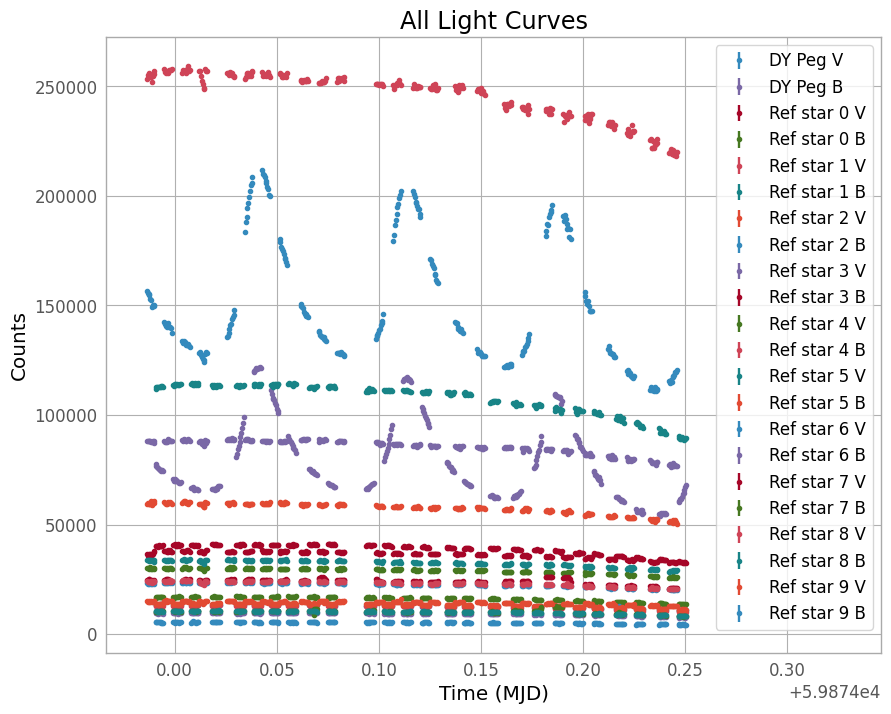

In [6]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')

plt.errorbar(sciTimeOBSArrayV, sciFluxArrayV, yerr=sciFluxErrArrayV, fmt='.', label='DY Peg V')
plt.errorbar(sciTimeOBSArrayB, sciFluxArrayB, yerr=sciFluxErrArrayB, fmt='.', label='DY Peg B')

for i in range(10):
    refStarLabelV = 'Ref star ' + str(i) + ' V'
    refStarLabelB = 'Ref star ' + str(i) + ' B'
    plt.errorbar(refTimeOBSArrayV[i], refFluxArrayV[i], yerr=refFluxErrArrayV[i], fmt='.', label=refStarLabelV)
    plt.errorbar(refTimeOBSArrayB[i], refFluxArrayB[i], yerr=refFluxErrArrayB[i], fmt='.', label=refStarLabelB)

xMin = np.min(sciTimeOBSArrayV) - 0.02
xMax = np.max(sciTimeOBSArrayV) + 0.10

plt.xlim([xMin,xMax])
plt.xlabel('Time (MJD)')
plt.ylabel('Counts')
plt.legend()
plt.title('All Light Curves')
plt.savefig('lightcurves_all.png');

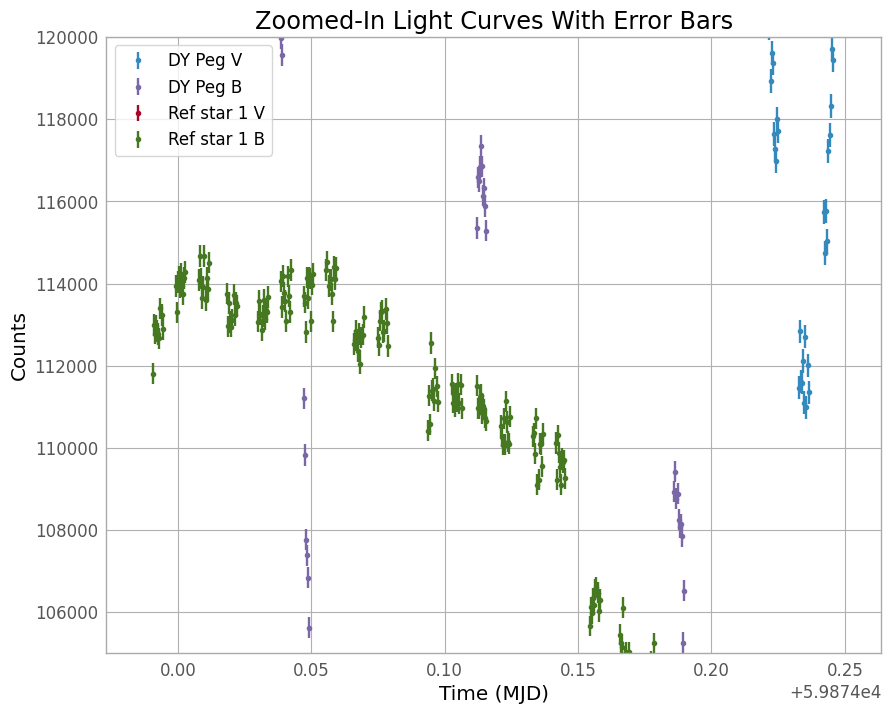

In [94]:
### Zoom in to see the error bars, they look reasonable!

os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')

plt.errorbar(sciTimeOBSArrayV, sciFluxArrayV, yerr=sciFluxErrArrayV, fmt='.', label='DY Peg V')
plt.errorbar(sciTimeOBSArrayB, sciFluxArrayB, yerr=sciFluxErrArrayB, fmt='.', label='DY Peg B')

for i in range(10):
    refStarLabelV = 'Ref star ' + str(i) + ' V'
    refStarLabelB = 'Ref star ' + str(i) + ' B'
    if (i==1):
        plt.errorbar(refTimeOBSArrayV[i], refFluxArrayV[i], yerr=refFluxErrArrayV[i], fmt='.', label=refStarLabelV)
        plt.errorbar(refTimeOBSArrayB[i], refFluxArrayB[i], yerr=refFluxErrArrayB[i], fmt='.', label=refStarLabelB)

plt.xlabel('Time (MJD)')
plt.ylabel('Counts')
plt.legend()
plt.title('Zoomed-In Light Curves With Error Bars');
# plt.xlim(0.1+5.9874e4, 0.15+5.9874e4)
plt.ylim(105000,120000)
plt.savefig('lightcurves_errorbar.png');

### Plot Normalized Reference Stars, Cut Outliers, and Create a Sky Calibration Function

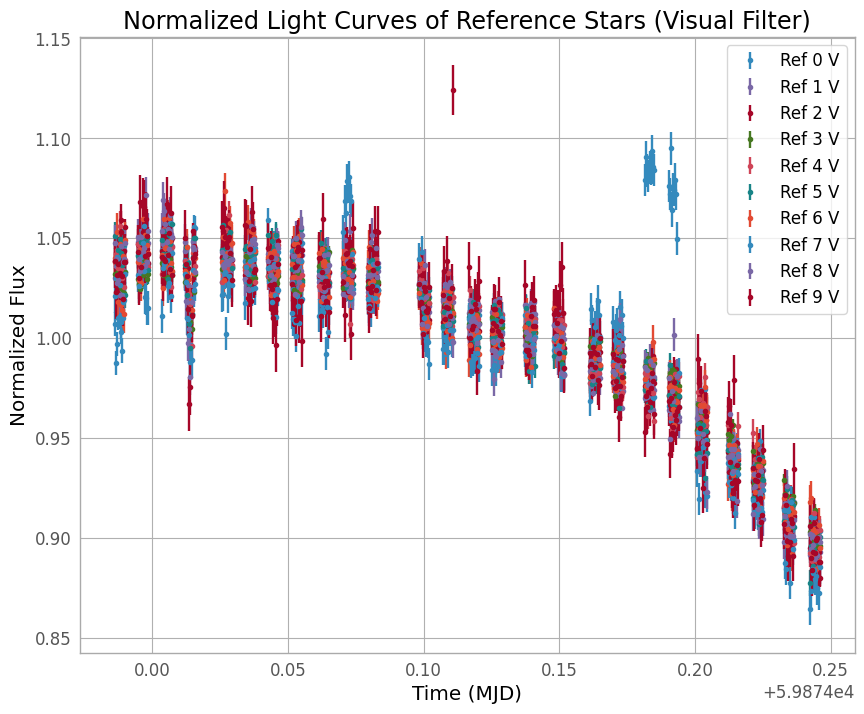

In [8]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')

refFluxArrayVNorm = np.empty((0,259))
refFluxErrArrayVNorm = np.empty((0,259))
refFluxArrayBNorm = np.empty((0,261))
refFluxErrArrayBNorm = np.empty((0,261))

# Normalize
for i in range(10):
    refFluxArrayVNorm = np.append(refFluxArrayVNorm, [refFluxArrayV[i] / np.nanmean(refFluxArrayV[i])], axis = 0)
    refFluxErrArrayVNorm = np.append(refFluxErrArrayVNorm, [refFluxErrArrayV[i] / np.nanmean(refFluxArrayV[i])], axis = 0)
    refFluxArrayBNorm = np.append(refFluxArrayBNorm, [refFluxArrayB[i] / np.nanmean(refFluxArrayB[i])], axis = 0)
    refFluxErrArrayBNorm = np.append(refFluxErrArrayBNorm, [refFluxErrArrayB[i] / np.nanmean(refFluxArrayB[i])], axis = 0)

for i in range(10):
    plt.errorbar(refTimeOBSArrayV[i], refFluxArrayVNorm[i], yerr=refFluxErrArrayVNorm[i], fmt='.', label='Ref '+str(i)+' V')
plt.legend(loc='best')
plt.xlabel('Time (MJD)')
plt.ylabel('Normalized Flux')
plt.title('Normalized Light Curves of Reference Stars (Visual Filter)')
plt.savefig('lightcurves_refnormV.png');

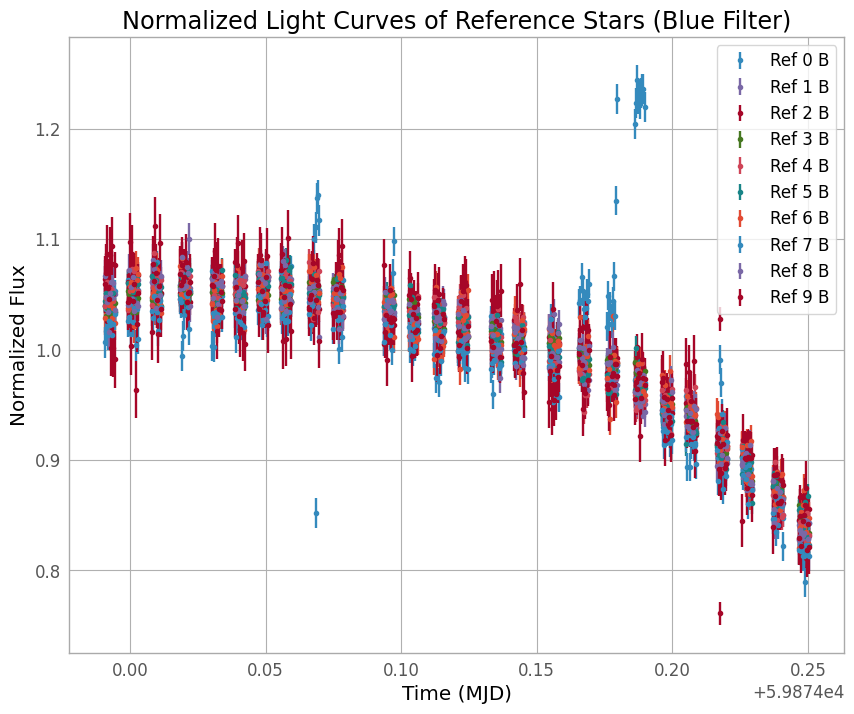

In [9]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')

for i in range(10):
    plt.errorbar(refTimeOBSArrayB[i], refFluxArrayBNorm[i], yerr=refFluxErrArrayBNorm[i], fmt='.', label='Ref '+str(i)+' B')
plt.legend(loc='best')
plt.xlabel('Time (MJD)')
plt.ylabel('Normalized Flux')
plt.title('Normalized Light Curves of Reference Stars (Blue Filter)')
plt.savefig('lightcurves_refnormB.png');

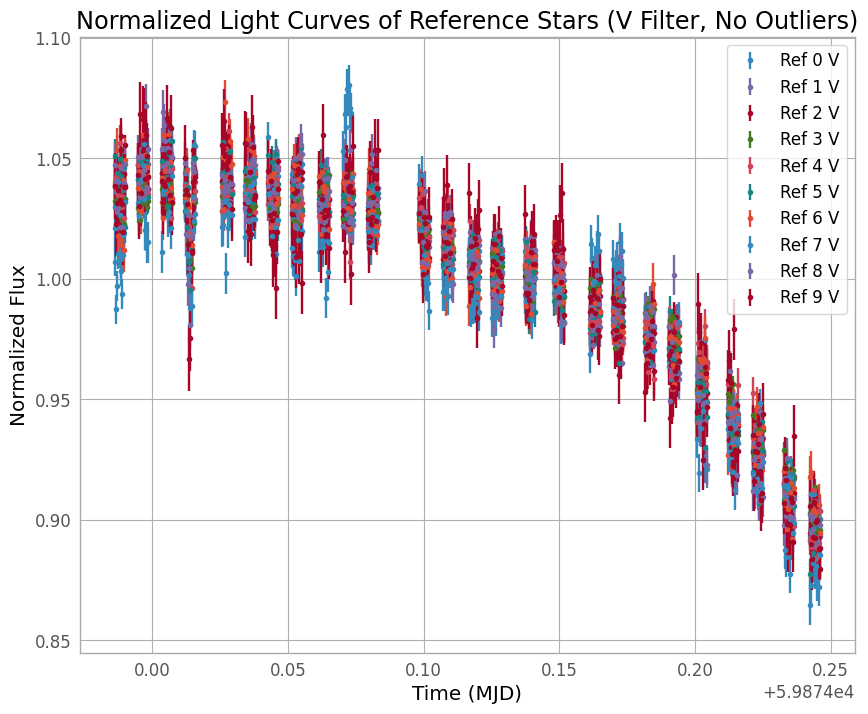

In [10]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')

refFluxArrayVNormCut = refFluxArrayVNorm
refFluxErrArrayVNormCut = refFluxErrArrayVNorm

# A lazy but simple way to cut out the outlier (visual inspection shows it's bad)
for i in range(10):
    for j in range(259):
        if (refFluxArrayVNormCut[i,j] > 1.045) and (refTimeOBSArrayV[i,j] > (0.1+5.9874e4)):
            refFluxArrayVNormCut[i,j] = np.nan
            refFluxErrArrayVNormCut[i,j] = np.nan

for i in range(10):
    plt.errorbar(refTimeOBSArrayV[i], refFluxArrayVNormCut[i], yerr=refFluxErrArrayVNormCut[i], fmt='.', label='Ref '+str(i)+' V')
plt.legend(loc='best')
plt.xlabel('Time (MJD)')
plt.ylabel('Normalized Flux')
plt.title('Normalized Light Curves of Reference Stars (V Filter, No Outliers)')
plt.savefig('lightcurves_refnormV_outliernone.png');

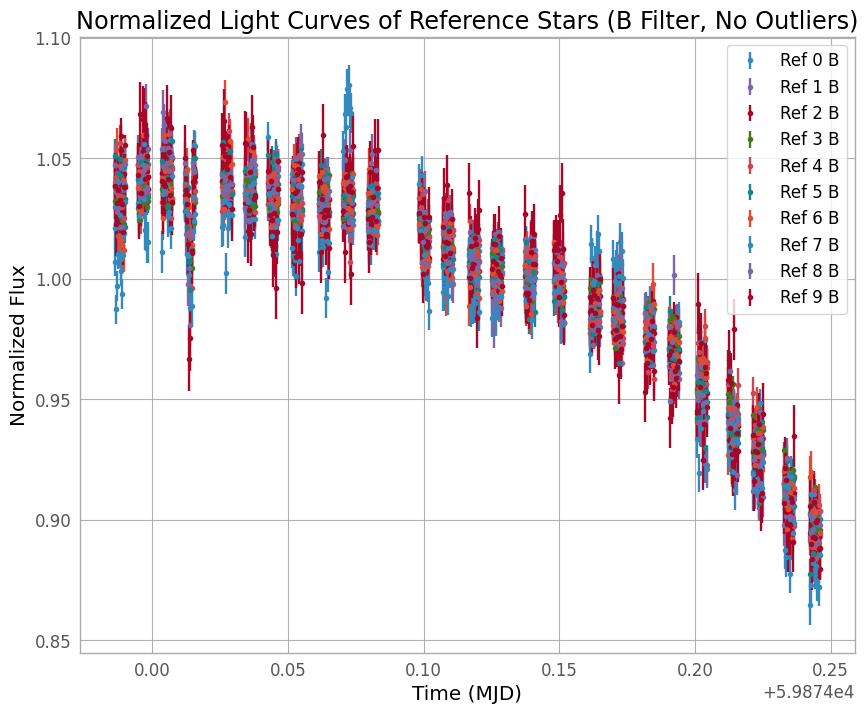

In [11]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')

refFluxArrayBNormCut = refFluxArrayBNorm
refFluxErrArrayBNormCut = refFluxErrArrayBNorm

# A lazy but simple way to cut out the outlier (visual inspection shows it's bad)
for i in range(10):
    for j in range(259):
        if (refFluxArrayBNormCut[i,j] > 1.1) and (refTimeOBSArrayB[i,j] > (0.15+5.9874e4)) or \
           (refFluxArrayBNormCut[i,j] < 0.900) and (refTimeOBSArrayB[i,j] < (0.1+5.9874e4)) or \
           (refFluxArrayBNormCut[i,j] < 0.800) and (refTimeOBSArrayB[i,j] < (0.225+5.9874e4)):
            refFluxArrayBNormCut[i,j] = np.nan
            refFluxErrArrayBNormCut[i,j] = np.nan

for i in range(10):
    plt.errorbar(refTimeOBSArrayV[i], refFluxArrayVNormCut[i], yerr=refFluxErrArrayVNormCut[i], fmt='.', label='Ref '+str(i)+' B')
plt.legend(loc='best')
plt.xlabel('Time (MJD)')
plt.ylabel('Normalized Flux')
plt.title('Normalized Light Curves of Reference Stars (B Filter, No Outliers)')
plt.savefig('lightcurves_refnormB_outliernone.png');

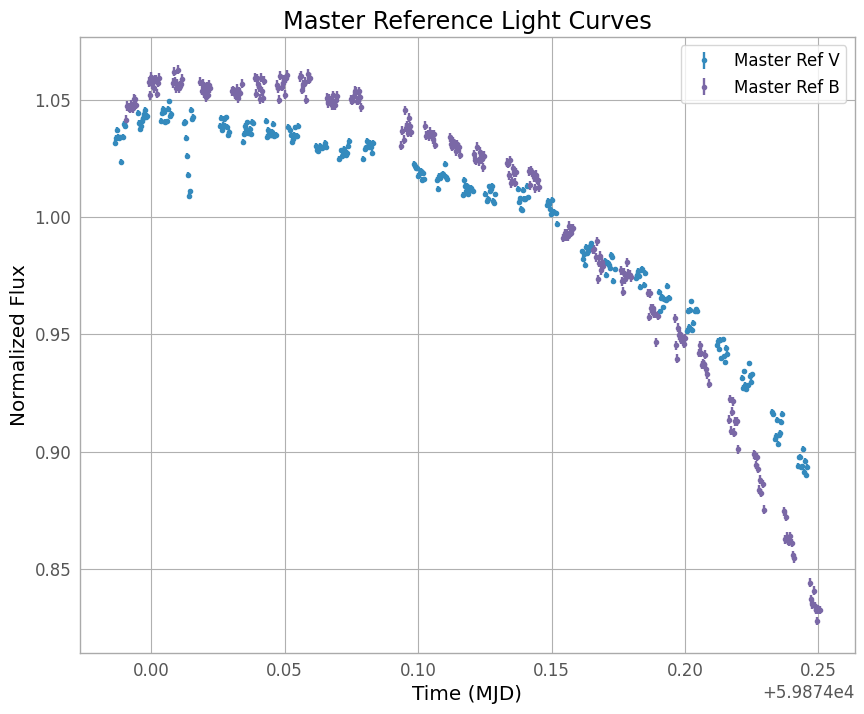

In [12]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')

# Perform a weighted average of each reference star, with weight being affected by error, as specified in Lab 2 Manual
weightsV = np.reciprocal(np.square(np.delete(refFluxErrArrayVNormCut, 7, 0)))
weightsB = np.reciprocal(np.square(np.delete(refFluxErrArrayBNormCut, 7, 0)))

refMeanV = np.nansum(weightsV * np.delete(refFluxArrayVNormCut, 7, 0), axis = 0) / np.nansum(weightsV, axis = 0)
refMeanErrV = np.reciprocal(np.sqrt(np.nansum(weightsV, axis = 0)))
refMeanB = np.nansum(weightsB * np.delete(refFluxArrayBNormCut, 7, 0), axis = 0) / np.nansum(weightsB, axis = 0)
refMeanErrB = np.reciprocal(np.sqrt(np.nansum(weightsB, axis = 0)))

plt.errorbar(refTimeOBSArrayV[0], refMeanV, yerr=refMeanErrV, fmt='.', label='Master Ref V')
plt.errorbar(refTimeOBSArrayB[0], refMeanB, yerr=refMeanErrB, fmt='.', label='Master Ref B')
plt.legend(loc='best')
plt.xlabel('Time (MJD)')
plt.ylabel('Normalized Flux')
plt.title('Master Reference Light Curves')
plt.savefig('lightcurves_masterref.png');

### Apply Master Reference Star Curve to Science Star

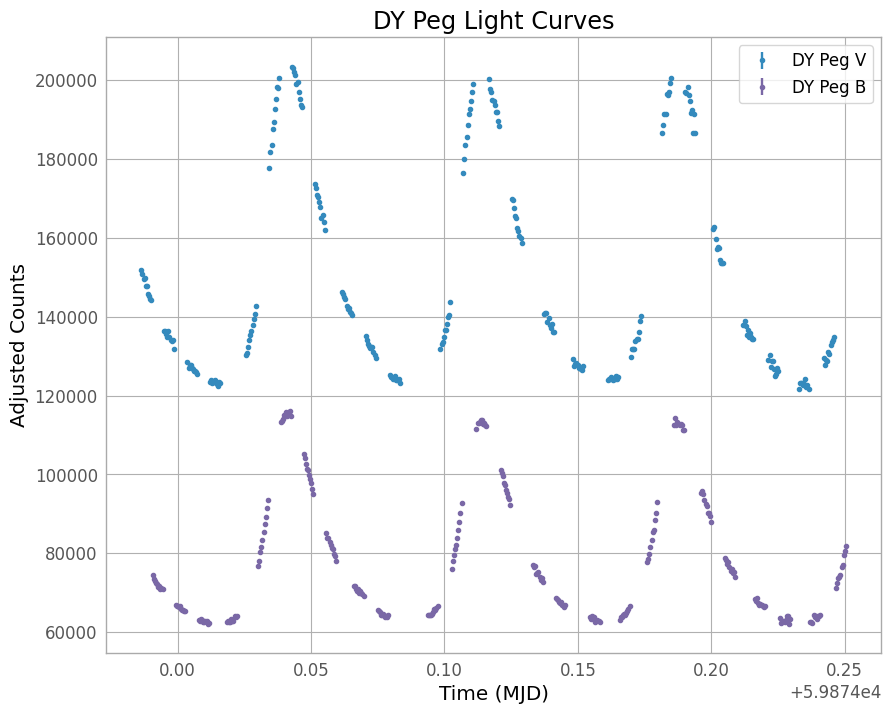

In [13]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')

sciFluxArrayVFinal = sciFluxArrayV / refMeanV
sciFluxErrArrayVFinal = np.absolute(sciFluxArrayV / refMeanV) * np.sqrt(np.square(sciFluxErrArrayV / sciFluxArrayV) + np.square(refMeanErrV / refMeanV))
sciFluxArrayBFinal = np.append(sciFluxArrayB, np.nan) / refMeanB
sciFluxErrArrayBFinal = np.absolute(np.append(sciFluxArrayB, np.nan) / refMeanB) * np.sqrt(np.square(np.append(sciFluxErrArrayB, np.nan) / np.append(sciFluxArrayB, np.nan)) + np.square(refMeanErrB / refMeanB))

plt.errorbar(sciTimeOBSArrayV, sciFluxArrayVFinal, yerr=sciFluxErrArrayVFinal, fmt='.', label='DY Peg V')
plt.errorbar(np.append(sciTimeOBSArrayB, np.nan), sciFluxArrayBFinal, yerr=sciFluxErrArrayBFinal, fmt='.', label='DY Peg B')
plt.legend(loc='best')
plt.xlabel('Time (MJD)')
plt.ylabel('Adjusted Counts')
plt.title('DY Peg Light Curves');
#plt.xlim(0.11+5.9874e4,0.12+5.9874e4)
#plt.ylim(110000,120000)

plt.savefig('normlightcurve_target.png');  # Save figure

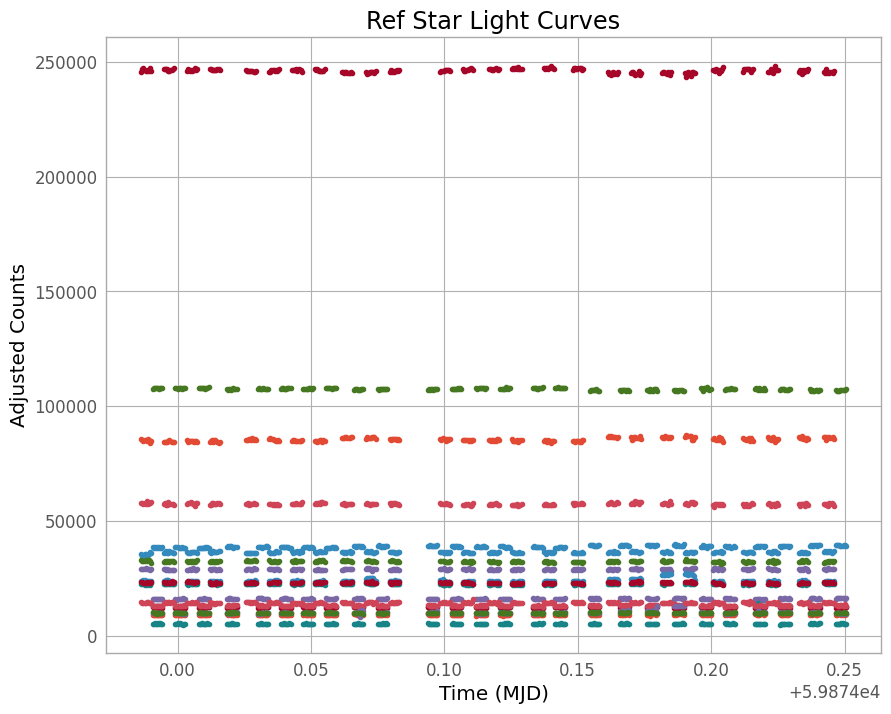

In [14]:
### We can also apply the curve to the reference stars to see how they flatten out, for fun
refFluxArrayVFinal = refFluxArrayV / refMeanV
refFluxErrArrayVFinal = np.absolute(refFluxArrayV / refMeanV) * np.sqrt(np.square(refFluxErrArrayV / refFluxArrayV) + np.square(refMeanErrV / refMeanV))
refFluxArrayBFinal = refFluxArrayB / refMeanB
refFluxErrArrayBFinal = np.absolute(refFluxArrayB / refMeanB) * np.sqrt(np.square(refFluxErrArrayB / refFluxArrayB) + np.square(refMeanErrB / refMeanB))

for i in range(10):
    plt.errorbar(refTimeOBSArrayV[i], refFluxArrayVFinal[i], yerr=refFluxErrArrayVFinal[i], fmt='.')
    plt.errorbar(refTimeOBSArrayB[i], refFluxArrayBFinal[i], yerr=refFluxErrArrayBFinal[i], fmt='.')
plt.xlabel('Time (MJD)')
plt.ylabel('Adjusted Counts')
plt.title('Ref Star Light Curves');

### Convert Flux to Magnitude using a Reference Star

0.544


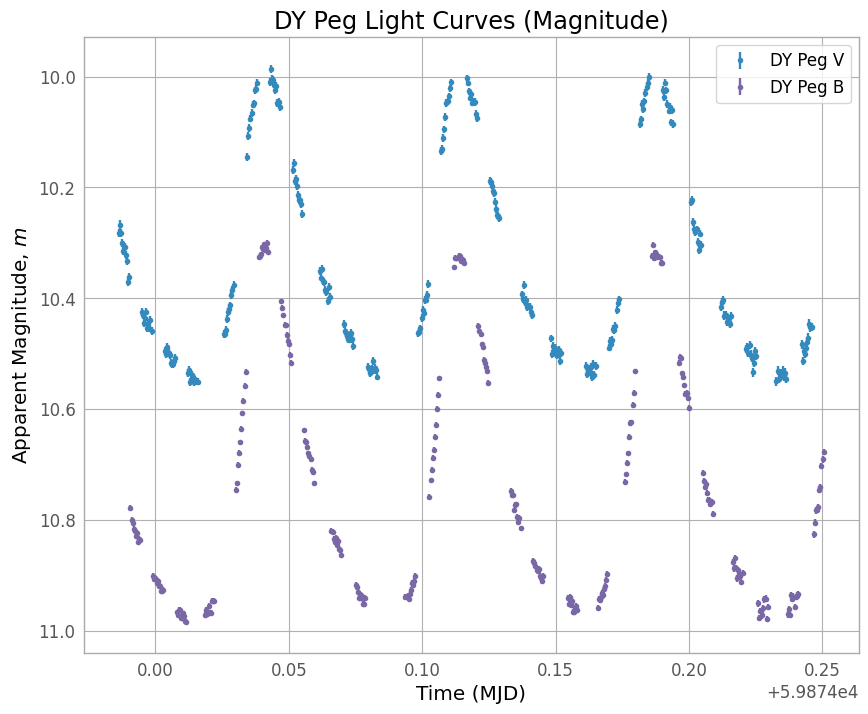

In [15]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')

# We used 2 stars
# DY Pegasi is the 2nd brightest star in image
# APASS photometric catalog only shows a blue magnitude for the brightest star in the image
# Therefore, we must take a visual magnitude from the 3rd brightest star
# The blue magnitudes of all other stars besides the top 2 brightest stars are too low, therefore the signal-to-noise ratio is awkward,
# therefore leading to a greater uncertainty in the period and less agreement in period. So we don't also take blue 

# Star is HD 218587 (search RA and Dec in SIMBAD), index=1
#magRefV = 9.816  
magRefB = 10.381 

# Star is GSC 01712-00542 (search RA and Dec in SIMBAD), index=0
magRefV2 = 11.871   
#magRefB2 = 12.440  

# Which reference star numbers did we use?
magRefIndex = 1
magRefIndex2 = 0  

# https://irsa.ipac.caltech.edu/workspace/TMP_YNGam2_4717/DUST/23_08_51.1858042512_+17_12_55.997525808.v0002/extinction.html
# Look up the extinction values along the line of sight to our target star
extinctionV = 0.411  #0.356
extBminusV =  0.133  #0.133
extinctionB = extinctionV + extBminusV       #0.483
print(extinctionB)

sciRatioV = sciFluxArrayVFinal / refFluxArrayVFinal[magRefIndex2]
sciRatioErrV = np.absolute(sciFluxArrayVFinal / refFluxArrayVFinal[magRefIndex2]) * np.sqrt(np.square(sciFluxErrArrayVFinal / sciFluxArrayVFinal) + np.square(refFluxErrArrayVFinal[magRefIndex2] / refFluxArrayVFinal[magRefIndex2]))
sciRatioB = sciFluxArrayBFinal / refFluxArrayBFinal[magRefIndex]
sciRatioErrB = np.absolute(sciFluxArrayBFinal / refFluxArrayBFinal[magRefIndex]) * np.sqrt(np.square(sciFluxErrArrayBFinal / sciFluxArrayBFinal) + np.square(refFluxErrArrayBFinal[magRefIndex] / refFluxArrayBFinal[magRefIndex]))

sciMagArrayV = -100.0**(1.0/5.0) * np.log10(sciRatioV) + magRefV2
sciMagErrArrayV = -100.0**(1.0/5.0) * np.log10(sciRatioV - sciRatioErrV) + magRefV2 - sciMagArrayV
sciMagArrayB = -100.0**(1.0/5.0) * np.log10(sciRatioB) + magRefB
sciMagErrArrayB = -100.0**(1.0/5.0) * np.log10(sciRatioB - sciRatioErrB) + magRefB - sciMagArrayB

# Where do we use these values?
sciMagArrayVExt = sciMagArrayV - extinctionV
sciMagErrArrayVExt = sciMagErrArrayV - extinctionV
sciMagArrayBExt = sciMagArrayB - extinctionB
sciMagErrArrayBExt = sciMagErrArrayB - extinctionB

plt.errorbar(sciTimeOBSArrayV, sciMagArrayV, yerr=sciMagErrArrayV, fmt='.', label='DY Peg V')
plt.errorbar(np.append(sciTimeOBSArrayB, np.nan), sciMagArrayB, yerr=sciMagErrArrayB, fmt='.', label='DY Peg B')
plt.legend(loc='best')
plt.xlabel('Time (MJD)')
plt.ylabel('Apparent Magnitude, $m$')
plt.title('DY Peg Light Curves (Magnitude)');
plt.gca().invert_yaxis()

plt.savefig('lightcurvemag_dypeg.png');

### Lomb-Scargle Method to Find Period, a Simple Implementation

13.485368375349466


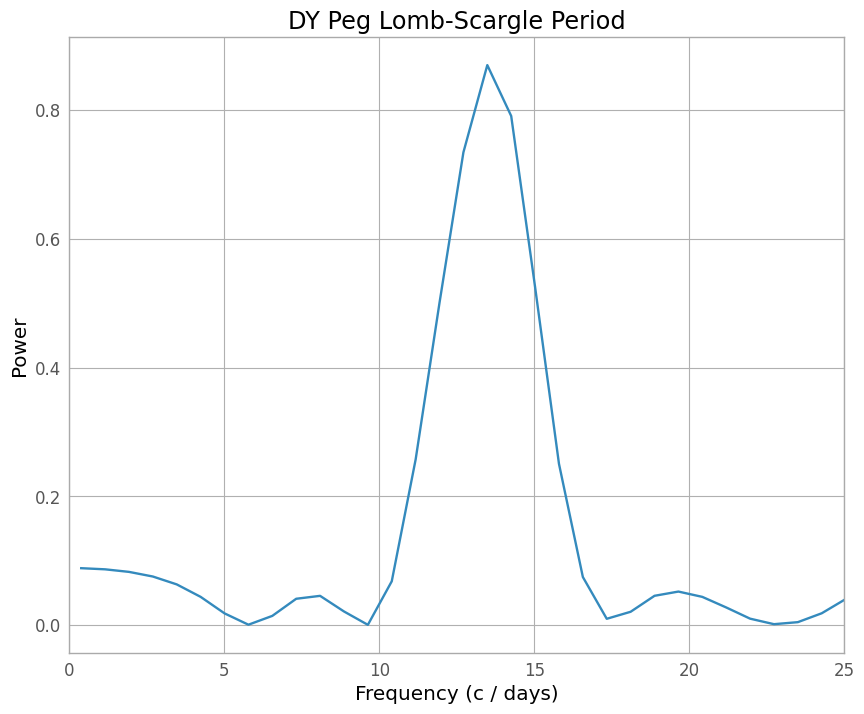

In [16]:
# Note: We don't actually use this result

frequency, power = LombScargle(sciTimeOBSArrayV, sciMagArrayV, sciMagErrArrayV).autopower()
plt.plot(frequency, power)
plt.xlabel('Frequency (c / days)')
plt.ylabel('Power')
plt.title('DY Peg Lomb-Scargle Period');
plt.xlim(0,25);
print(frequency[np.argmax(power)])

### PIPS Implementation - See Import for Detailed Paper - Fourier-likelihood Periodogram

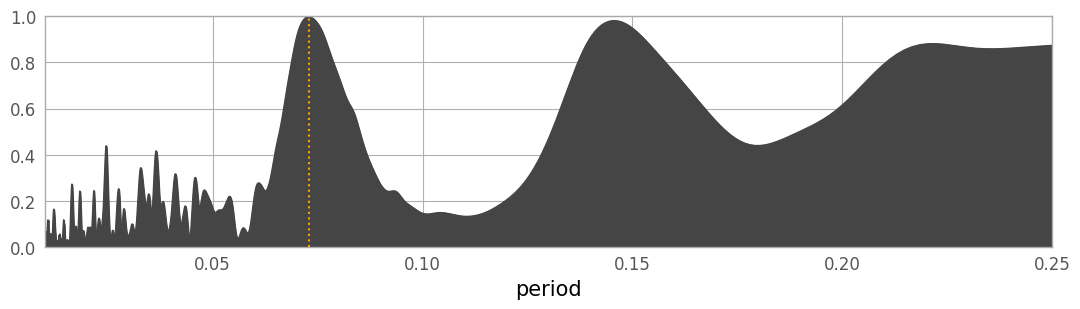

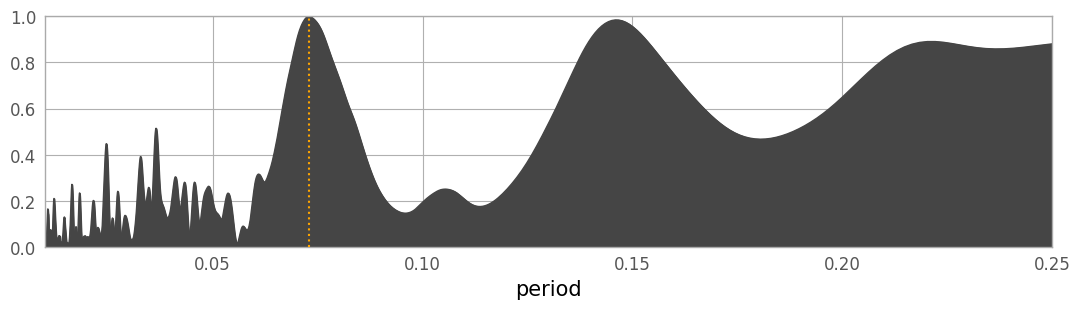

In [17]:
sciDataV = np.array([sciTimeOBSArrayV, sciMagArrayV, sciMagErrArrayV]) # Master data array
DYPegV = PIPS.photdata(sciDataV) # Feed data into PIPs, make a "DYPeg" Object
DYPegV.periodogram(p_min=0.01,p_max=0.25).refine().plot(show_peak=True) # Create periodogram with min, max, refine, and mark peak

sciDataB = np.array([sciTimeOBSArrayB, sciMagArrayB[~np.isnan(sciMagArrayB)], sciMagErrArrayB[~np.isnan(sciMagErrArrayB)]])
DYPegB = PIPS.photdata(sciDataB)
DYPegB.periodogram(p_min=0.01,p_max=0.25).refine().plot(show_peak=True)

(2490,) (2490,)
(2490,) (2490,)


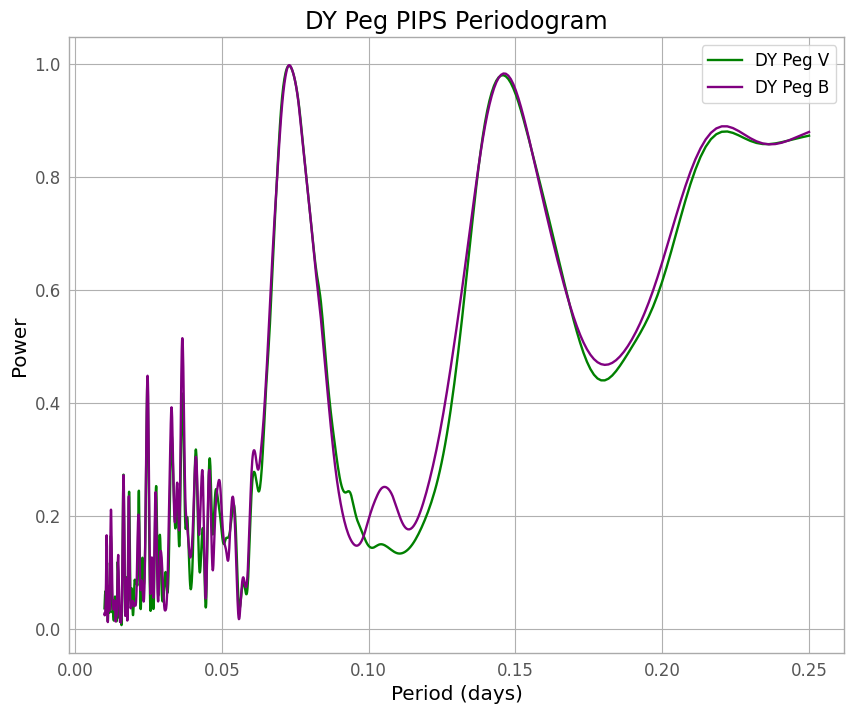

In [18]:
### We can plot these in a normal plot (uses numpy arrays)
DYPegPeriodsV, DYPegPowerV = DYPegV.periodogram(p_min=0.01,p_max=0.25).refine()
plt.plot(DYPegPeriodsV,DYPegPowerV, color='Green', label = 'DY Peg V');
print(DYPegPeriodsV.shape,DYPegPowerV.shape)

DYPegPeriodsB, DYPegPowerB = DYPegB.periodogram(p_min=0.01,p_max=0.25).refine()
plt.plot(DYPegPeriodsB,DYPegPowerB, color='Purple', label = 'DY Peg B');
print(DYPegPeriodsB.shape,DYPegPowerB.shape)

plt.legend(loc='best')
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.title('DY Peg PIPS Periodogram');

# output file
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')
plt.savefig('periodogram.png')

### Get_Period Function: Auto-detect periodogram peak and refine near peak, 5-term Fourier Solution

In [19]:
DYPegV.get_period(p_min=0.01,p_max=0.25, N0 = 100, debug = True, model='Fourier', Nterms=6); # 6-term Fourier, with debug for fun, N0 is sampling
print('Period V:', DYPegV.period, '+-', DYPegV.period_err, 'd')
print('Frequency V:', 1 / DYPegV.period, '+-', DYPegV.period_err / DYPegV.period**2, 'c / d')
DYPegB.get_period(p_min=0.01,p_max=0.25, N0 = 100, model='Fourier', Nterms=6); # 6-term Fourier
print('Period: B', DYPegB.period, '+-', DYPegB.period_err, 'd')
print('Frequency: B', 1 / DYPegB.period, '+-', DYPegB.period_err / DYPegB.period**2, 'c / d')
print('Period Detection Complete.')

0.000s --- starting the process...
0.000s --- preparing data...
0.000s --- getting a periodogram...
0.377s --- detecting top 5 peaks...
0.382s --- preparing for finer sampling near peaks...
0.383s --- performing finer sampling near peaks...
0.726s --- period candidate:  0.07288627914414623
2.160s --- detecting aliasing...
2.160s --- alias factor:  1
2.160s --- period candidate:  0.07288627914414623
2.160s --- estimating the uncertainty...
2.174s --- period candidate:  0.07288627914414623
2.174s --- period fitted*:  0.07288630396168844
2.174s --- period error:  4.3132509850018805e-05
2.174s --- * validating period error...
2.174s --- * fitted period - peak period = 2.48e-08
2.174s --- * expected deviation size = 4.31e-05
2.174s --- * period error validated
2.174s --- period = 0.072886 +- 0.000043d
2.174s --- process completed.
Period V: 0.07288662085636348 +- 3.1146447006237726e-05 d
Frequency V: 13.719939108861753 +- 0.005862905309125228 c / d
Period: B 0.0729174565405002 +- 1.33541116

### Creating a Phase-Folded Plot with The Best Fit Curve

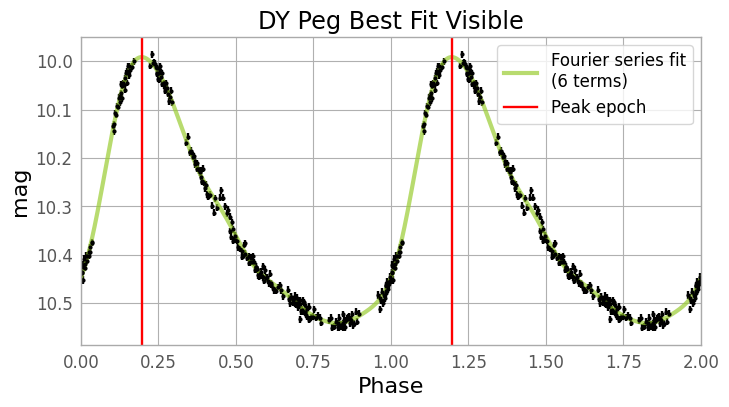

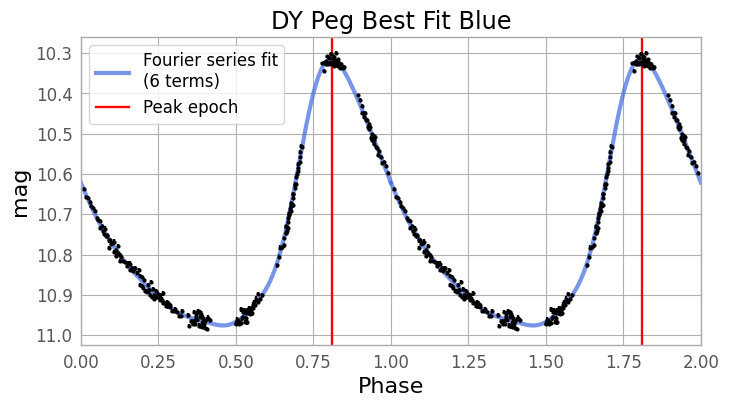

In [20]:
# phase-folded plot
DYPegV.plot_lc() # plots (x%period, y) scatter: normalized to phase
x_thV,y_thV = DYPegV.get_bestfit_curve(model='Fourier', Nterms = 6, return_param_err=True)
epoch_offsetV = DYPegV.get_epoch_offset() # the epoch offset in the unit of [days] (not normalized to phase)

# plot
plt.plot(x_thV/DYPegV.period,y_thV,c='yellowgreen',lw=3,alpha=0.7, label='Fourier series fit\n(6 terms)')
plt.plot(x_thV/DYPegV.period+1,y_thV,c='yellowgreen',lw=3,alpha=0.7)
plt.axvline(epoch_offsetV/DYPegV.period,color='red', label='Peak epoch')
plt.axvline(epoch_offsetV/DYPegV.period+1,color='red')
plt.legend(loc='upper right')
plt.title('DY Peg Best Fit Visible');

# save figure
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')
plt.savefig('curvefitV.png')

# phase-folded plot
DYPegB.plot_lc() # plots (x%period, y) scatter: normalized to phase
x_thB,y_thB = DYPegB.get_bestfit_curve(model='Fourier', Nterms = 6, return_param_err=True)
epoch_offsetB = DYPegB.get_epoch_offset() # the epoch offset in the unit of [days] (not normalized to phase)

# plot
plt.plot(x_thB/DYPegB.period,y_thB,c='royalblue',lw=3,alpha=0.7, label='Fourier series fit\n(6 terms)')
plt.plot(x_thB/DYPegB.period+1,y_thB,c='royalblue',lw=3,alpha=0.7)
plt.axvline(epoch_offsetB/DYPegB.period,color='red', label='Peak epoch')
plt.axvline(epoch_offsetB/DYPegB.period+1,color='red')
plt.legend(loc='upper left')
plt.title('DY Peg Best Fit Blue');

# save figure
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis')
plt.savefig('curvefitB.png')

### Determining Luminosity and Distance

In [21]:
bollcorr = -0.12
# https://www.astro.princeton.edu/~gk/A403/constants.pdf

# MV = −1.640 − 3.389 log Pf
#      ±0.110 ± 0.090.

absMag = -1.640 - 3.389 * np.log10(DYPegV.period)
absMagBoll = -1.640 - 3.389 * np.log10(DYPegV.period) + bollcorr
absMagErr = np.sqrt((np.sqrt(0.110**2 + (3.389 * (np.log(10)*DYPegV.period_err)/DYPegV.period)**2))**2 + 0.104**2)
print('Absolute Boll. Magnitude:', absMagBoll, '+-', absMagErr)
lum = 10**((1 / (100**(1/5)))*(4.73 - absMagBoll))
print('Luminosity:', lum, 'L_Sun')
print('log(L / L_Sun):', np.log10(lum)) 

Absolute Boll. Magnitude: 2.0944865512752466 +- 0.15141703924140526
Luminosity: 11.199968520947474 L_Sun
log(L / L_Sun): 1.0492168020275012


In [22]:
print('Mean error of app mag for DY Peg:', np.mean(sciMagErrArrayV))
print('Number of data points:', len(y_thV))

# Calculate apparent magnitude and its uncertainty
avgAppMag = np.mean(y_thV)
avgAppMagErr = np.mean(sciMagErrArrayV) / np.sqrt(len(y_thV))
print('Apparent Magnitude:', avgAppMag, '+-', avgAppMagErr)

dist = 10**((avgAppMag - absMag + 5 - extinctionV) / 5)
distErr = np.log(10)*(np.sqrt(avgAppMagErr**2 + absMagErr**2) / 5)*dist 
print('Distance:', dist, '+-', distErr, 'pc')

Mean error of app mag for DY Peg: 0.0070551597533498826
Number of data points: 1000
Apparent Magnitude: 10.331641292535554 +- 0.00022310374076937387
Distance: 347.7210226771296 +- 24.246656166622795 pc


Finding the min and max magnitudes in B and V filters as the min and max of the curve fits.

In [92]:
# Visible
minV = np.min(y_thV)
maxV = np.max(y_thV)

# Blue
minB = np.min(y_thB)
maxB = np.max(y_thB)

# print results
print('Range of V mag:', minV, maxV)
print('Range of B mag:', minB, maxB)

Range of V mag: 9.991513323481927 10.54129241052164
Range of B mag: 10.314485506290564 10.975946667506346


### Creating a B-V Light Curve

Max App Visible Magnitude: 10.54129241052164
Average App Visible Magnitude: 10.331641292535554
Min App Visible Magnitude: 9.991513323481927
Max App Blue Magnitude: 10.975946667506346
Average App Blue Magnitude: 10.734721277231893
Min App Blue Magnitude: 10.314485506290564


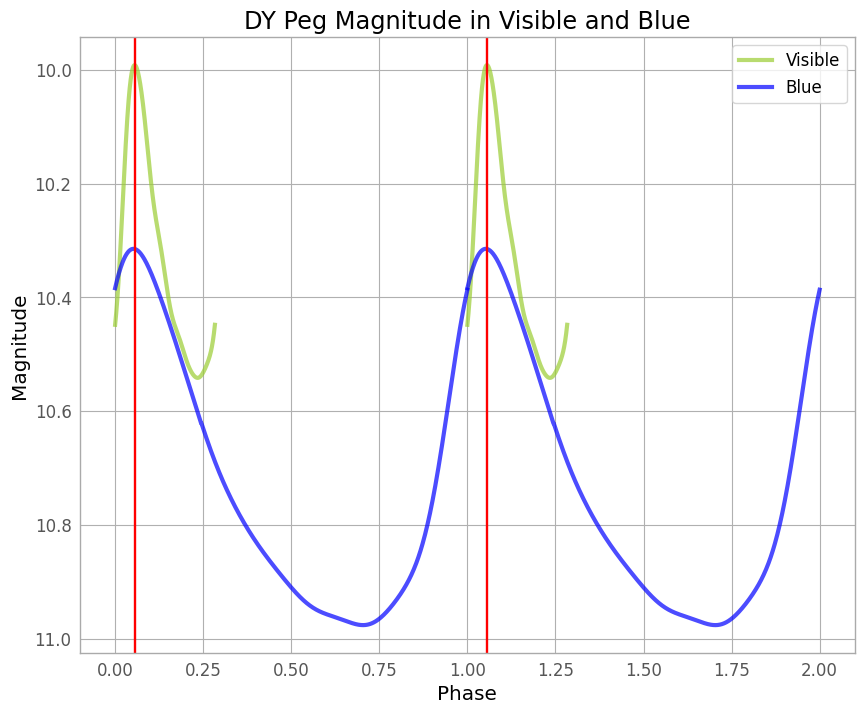

In [93]:
rollNum = -int(np.round((epoch_offsetB/DYPegB.period - epoch_offsetV/DYPegV.period) * 1000))

newy_thB = np.roll(y_thB, rollNum)

# plot
# DYPegV.plot_lc() # plots (x%period, y) scatter: normalized to phase
# DYPegB.plot_lc() # plots (x%period, y) scatter: normalized to phase

plt.plot(x_thV/DYPegV.period,y_thV,c='yellowgreen',lw=3,alpha=0.7, label = 'Visible')
plt.plot(x_thV/DYPegV.period+1,y_thV,c='yellowgreen',lw=3,alpha=0.7)
plt.plot(x_thB/DYPegB.period,newy_thB,c='blue',lw=3,alpha=0.7, label = 'Blue')
plt.plot(x_thB/DYPegB.period+1,newy_thB,c='blue',lw=3,alpha=0.7)

plt.axvline(epoch_offsetV/DYPegV.period,color='red')
plt.axvline(epoch_offsetV/DYPegV.period+1,color='red')

plt.legend(loc='best')
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('DY Peg Magnitude in Visible and Blue');
plt.gca().invert_yaxis();

# Save figure
plt.savefig('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis/curvefitBV.png')

print('Max App Visible Magnitude:', np.max(y_thV))
print('Average App Visible Magnitude:', np.mean(y_thV))
print('Min App Visible Magnitude:', np.min(y_thV))

print('Max App Blue Magnitude:', np.max(y_thB))
print('Average App Blue Magnitude:', np.mean(y_thB))
avgAppMagErrB = np.mean(sciMagErrArrayB) / np.sqrt(len(y_thB))
print('Uncertainty of Blue Magnitude:', )
print('Min App Blue Magnitude:', np.min(y_thB))

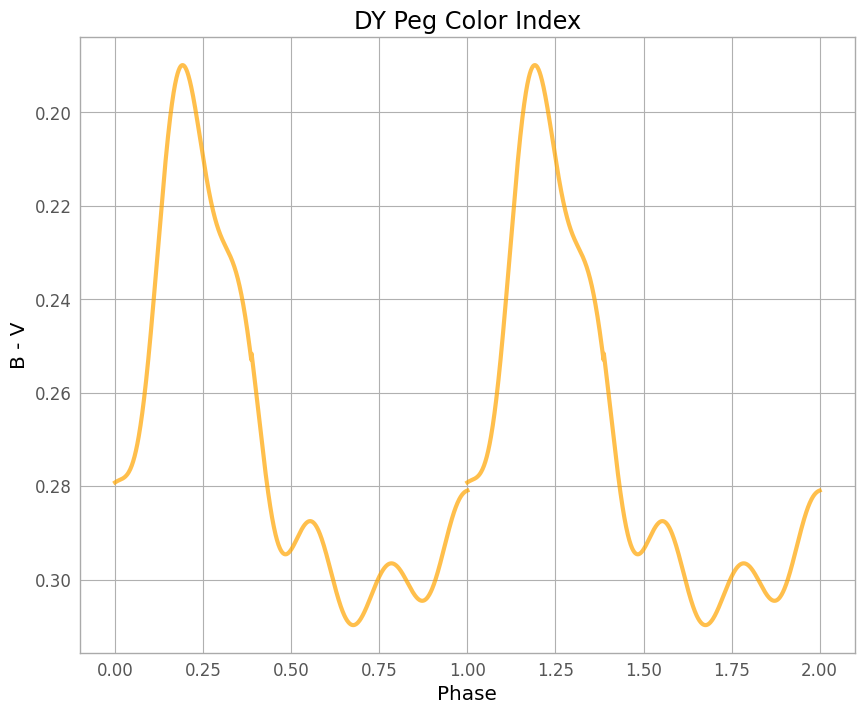

In [24]:
### There is a gap due to different best fits for the B and V data respectively
plt.plot((x_thB)/DYPegB.period,newy_thB-y_thV - extBminusV,c='orange',lw=3,alpha=0.7)
plt.plot((x_thB)/DYPegB.period+1,newy_thB-y_thV - extBminusV,c='orange',lw=3,alpha=0.7)
#plt.plot((x_thB)/DYPegB.period,newy_thB-y_thV-extBminusV,c='blue',lw=3,alpha=0.7)
#plt.plot((x_thB)/DYPegB.period+1,newy_thB-y_thV-extBminusV,c='blue',lw=3,alpha=0.7)
plt.xlabel('Phase')
plt.ylabel('B - V');
plt.title('DY Peg Color Index');
plt.gca().invert_yaxis();

# save figure
plt.savefig('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis/periodogram_color.png')

# https://articles.adsabs.harvard.edu/pdf/1970A%26A.....4..234F
# Ranges from A0 to A3
# Ranges from A2 to A5
# Ranges from A4 to A7.5
# Ranges from A7.5 to F2.5

### Temperature Curve using Ballesteros's Formula

Average Temp: 7666.388571055678 K
log T: 3.884590827700564


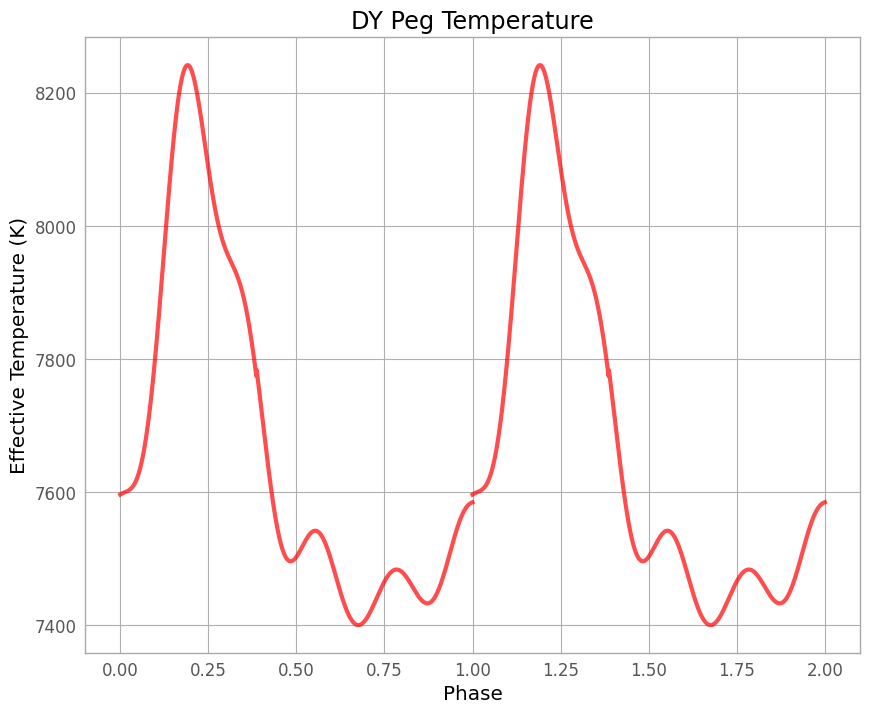

In [25]:
# Ballesteros's Formula https://arxiv.org/abs/1201.1809
DYPegTemp = 4600.0 * ((1.0 / (0.92*(newy_thB-y_thV-extBminusV) + 1.7)) + (1.0 / (0.92*(newy_thB-y_thV-extBminusV) + 0.62)))

plt.plot((x_thB)/DYPegB.period,DYPegTemp,c='red',lw=3,alpha=0.7)
plt.plot((x_thB)/DYPegB.period+1,DYPegTemp,c='red',lw=3,alpha=0.7);
#plt.plot((x_thB)/DYPegB.period,DYPegTemp2,c='blue',lw=3,alpha=0.7)
#plt.plot((x_thB)/DYPegB.period+1,DYPegTemp2,c='blue',lw=3,alpha=0.7);

plt.xlabel('Phase')
plt.ylabel('Effective Temperature (K)');
plt.title('DY Peg Temperature');

# Plot diagram
plt.savefig('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis/periodogram_temp.png')

print('Average Temp:', np.average(DYPegTemp), 'K')
print('Average Temp Uncert:', )
print('log T:', np.log10(np.average(DYPegTemp)))

### Rough Estimation of Mass from Isotherms

In [26]:
# https://www.unige.ch/sciences/astro/evolution/fr/base-de-donnees/
# https://arxiv.org/abs/2201.12262 is the same as https://articles.adsabs.harvard.edu/pdf/1993A%26AS...98..523S

os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)')

isochrome17 = np.transpose(np.loadtxt('M1p700Z00600V06400.dat', skiprows=2))
icmag17 = isochrome17[3]
ictem17 = isochrome17[4]

isochrome16 = np.transpose(np.loadtxt('M1p600Z00600V06400.dat', skiprows=2))
icmag16 = isochrome16[3]
ictem16 = isochrome16[4]

isochrome15 = np.transpose(np.loadtxt('M1p500Z00600V06400.dat', skiprows=2))
icmag15 = isochrome15[3]
ictem15 = isochrome15[4]

isochrome14 = np.transpose(np.loadtxt('M1p400Z00600V06400.dat', skiprows=2))
icmag14 = isochrome14[3]
ictem14 = isochrome14[4]

isochrome13 = np.transpose(np.loadtxt('M1p300Z00600V06400.dat', skiprows=2))
icmag13 = isochrome13[3]
ictem13 = isochrome13[4]

isochrome12 = np.transpose(np.loadtxt('M1p200Z00600V06400.dat', skiprows=2))
icmag12 = isochrome12[3]
ictem12 = isochrome12[4]

isochromeR17 = np.transpose(np.loadtxt('M1p700Z00600V56800.dat', skiprows=2))
icmagR17 = isochromeR17[3]
ictemR17 = isochromeR17[4]

isochromeR16 = np.transpose(np.loadtxt('M1p600Z00600V56800.dat', skiprows=2))
icmagR16 = isochromeR16[3]
ictemR16 = isochromeR16[4]

isochromeR15 = np.transpose(np.loadtxt('M1p500Z00600V56800.dat', skiprows=2))
icmagR15 = isochromeR15[3]
ictemR15 = isochromeR15[4]

isochromeR14 = np.transpose(np.loadtxt('M1p400Z00600V56800.dat', skiprows=2))
icmagR14 = isochromeR14[3]
ictemR14 = isochromeR14[4]

isochromeR13 = np.transpose(np.loadtxt('M1p300Z00600V56800.dat', skiprows=2))
icmagR13 = isochromeR13[3]
ictemR13 = isochromeR13[4]

isochromeR12 = np.transpose(np.loadtxt('M1p200Z00600V56800.dat', skiprows=2))
icmagR12 = isochromeR12[3]
ictemR12 = isochromeR12[4]

isochromeM17 = np.transpose(np.loadtxt('M1p700Z00200V06400.dat', skiprows=2))
icmagM17 = isochromeM17[3]
ictemM17 = isochromeM17[4]

isochromeM16 = np.transpose(np.loadtxt('M1p600Z00200V06400.dat', skiprows=2))
icmagM16 = isochromeM16[3]
ictemM16 = isochromeM16[4]

isochromeM15 = np.transpose(np.loadtxt('M1p500Z00200V06400.dat', skiprows=2))
icmagM15 = isochromeM15[3]
ictemM15 = isochromeM15[4]

isochromeM14 = np.transpose(np.loadtxt('M1p400Z00200V06400.dat', skiprows=2))
icmagM14 = isochromeM14[3]
ictemM14 = isochromeM14[4]

isochromeM13 = np.transpose(np.loadtxt('M1p300Z00200V06400.dat', skiprows=2))
icmagM13 = isochromeM13[3]
ictemM13 = isochromeM13[4]

isochromeM12 = np.transpose(np.loadtxt('M1p200Z00200V06400.dat', skiprows=2))
icmagM12 = isochromeM12[3]
ictemM12 = isochromeM12[4]

isochromeM11 = np.transpose(np.loadtxt('M1p100Z00200V06400.dat', skiprows=2))
icmagM11 = isochromeM11[3]
ictemM11 = isochromeM11[4]

isochromeMR17 = np.transpose(np.loadtxt('M1p700Z00200V56800.dat', skiprows=2))
icmagMR17 = isochromeMR17[3]
ictemMR17 = isochromeMR17[4]

isochromeMR16 = np.transpose(np.loadtxt('M1p600Z00200V56800.dat', skiprows=2))
icmagMR16 = isochromeMR16[3]
ictemMR16 = isochromeMR16[4]

isochromeMR15 = np.transpose(np.loadtxt('M1p500Z00200V56800.dat', skiprows=2))
icmagMR15 = isochromeMR15[3]
ictemMR15 = isochromeMR15[4]

isochromeMR14 = np.transpose(np.loadtxt('M1p400Z00200V56800.dat', skiprows=2))
icmagMR14 = isochromeMR14[3]
ictemMR14 = isochromeMR14[4]

isochromeMR13 = np.transpose(np.loadtxt('M1p300Z00200V56800.dat', skiprows=2))
icmagMR13 = isochromeMR13[3]
ictemMR13 = isochromeMR13[4]

isochromeMR12 = np.transpose(np.loadtxt('M1p200Z00200V56800.dat', skiprows=2))
icmagMR12 = isochromeMR12[3]
ictemMR12 = isochromeMR12[4]

isochromeMR11 = np.transpose(np.loadtxt('M1p100Z00200V56800.dat', skiprows=2))
icmagMR11 = isochromeMR11[3]
ictemMR11 = isochromeMR11[4]

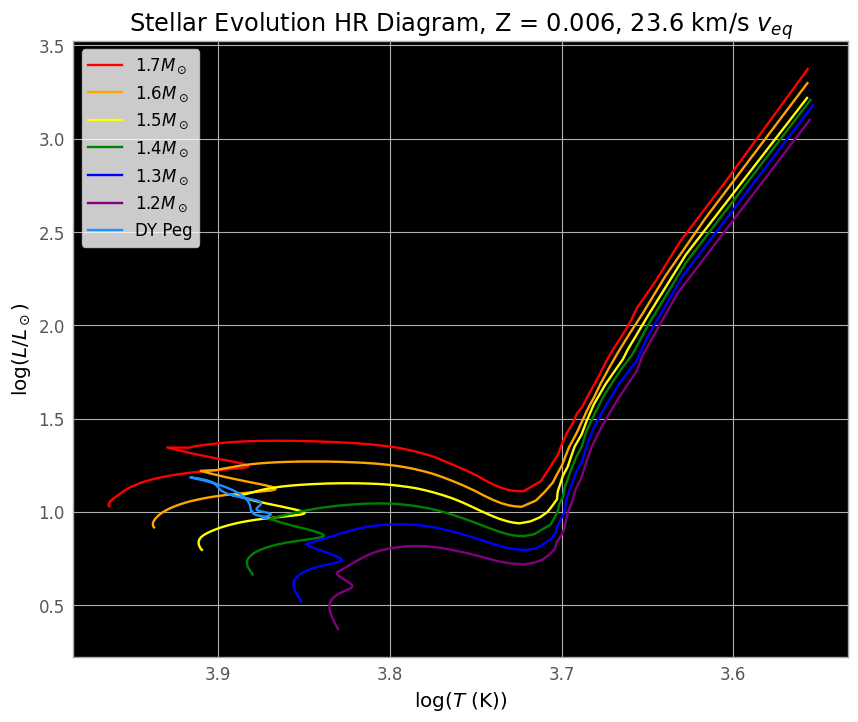

In [27]:
plt.plot(ictem17, icmag17,c='red', label='$1.7 M_\odot$')
plt.plot(ictem16, icmag16,c='orange', label='$1.6 M_\odot$')
plt.plot(ictem15, icmag15,c='yellow', label='$1.5 M_\odot$')
plt.plot(ictem14, icmag14,c='green', label='$1.4 M_\odot$')
plt.plot(ictem13, icmag13,c='blue', label='$1.3 M_\odot$')
plt.plot(ictem12, icmag12,c='purple', label='$1.2 M_\odot$')

plt.plot(np.log10(DYPegTemp), np.log10(10**((1/100**(1/5))*(4.73 - (y_thV - (np.mean(y_thV) - absMagBoll))))),c='dodgerblue', label='DY Peg')

plt.legend(loc='best')
plt.xlabel('log($T$ (K))')
plt.ylabel('log($L/L_\odot$)')
plt.title('Stellar Evolution HR Diagram, Z = 0.006, 23.6 km/s $v_{eq}$');
plt.gca().set_facecolor('black')
plt.gca().invert_xaxis()

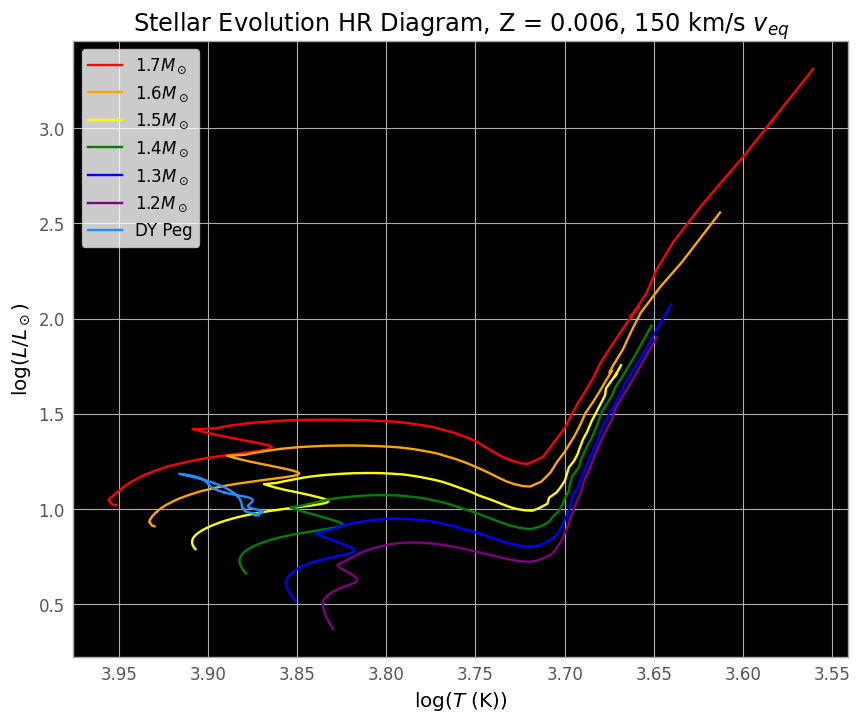

In [74]:
plt.plot(ictemR17, icmagR17,c='red', label='$1.7 M_\odot$')
plt.plot(ictemR16, icmagR16,c='orange', label='$1.6 M_\odot$')
plt.plot(ictemR15, icmagR15,c='yellow', label='$1.5 M_\odot$')
plt.plot(ictemR14, icmagR14,c='green', label='$1.4 M_\odot$')
plt.plot(ictemR13, icmagR13,c='blue', label='$1.3 M_\odot$')
plt.plot(ictemR12, icmagR12,c='purple', label='$1.2 M_\odot$')

plt.plot(np.log10(DYPegTemp), np.log10(10**((1/100**(1/5))*(4.73 - (y_thV - (np.mean(y_thV) - absMagBoll))))),c='dodgerblue', label='DY Peg')

plt.legend(loc='best')
plt.xlabel('log($T$ (K))')
plt.ylabel('log($L/L_\odot$)')
plt.title('Stellar Evolution HR Diagram, Z = 0.006, 150 km/s $v_{eq}$');
plt.gca().set_facecolor('black')
plt.gca().invert_xaxis()

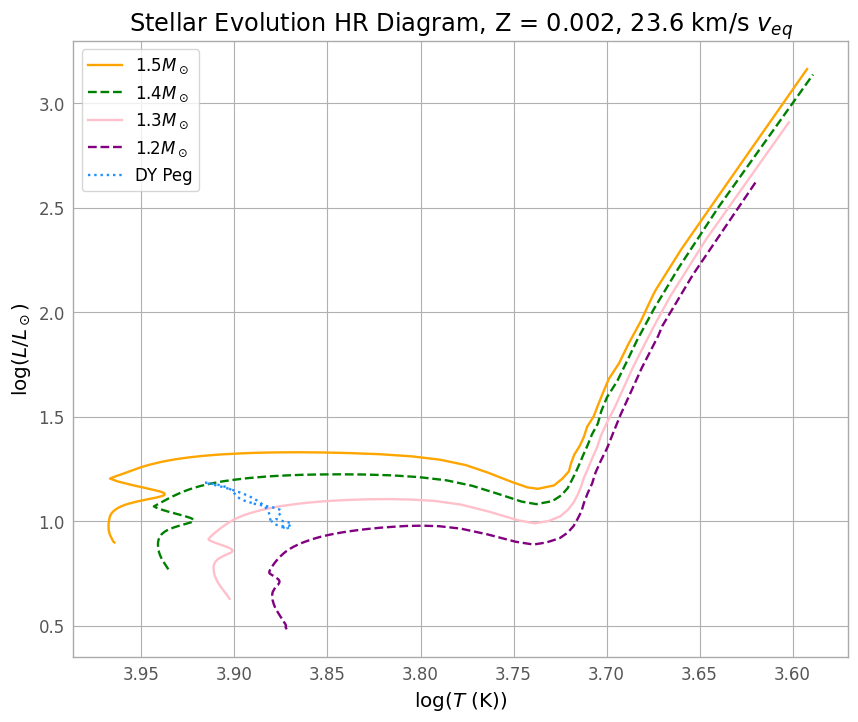

In [75]:
# plt.plot(ictemM17, icmagM17,c='red', label='$1.7 M_\odot$')
# plt.plot(ictemM16, icmagM16,c='orange', label='$1.6 M_\odot$')
plt.plot(ictemM15, icmagM15,c='orange', label='$1.5 M_\odot$')
plt.plot(ictemM14, icmagM14,c='green', linestyle='dashed', label='$1.4 M_\odot$')
plt.plot(ictemM13, icmagM13,c='pink', label='$1.3 M_\odot$')
plt.plot(ictemM12, icmagM12,c='purple', linestyle='dashed', label='$1.2M_\odot$')
# plt.plot(ictemM11, icmagM11,c='pink', label='$1.1M_\odot$')

plt.plot(np.log10(DYPegTemp), np.log10(10**((1/100**(1/5))*(4.73 - (y_thV - (np.mean(y_thV) - absMagBoll))))),c='dodgerblue', linestyle='dotted', label='DY Peg')

plt.legend(loc='best')
plt.xlabel('log($T$ (K))')
plt.ylabel('log($L/L_\odot$)')
plt.title('Stellar Evolution HR Diagram, Z = 0.002, 23.6 km/s $v_{eq}$');
# plt.gca().set_facecolor('black')
plt.gca().invert_xaxis()

# save figure
plt.savefig('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis/hrdiagram_veq23.6.png')

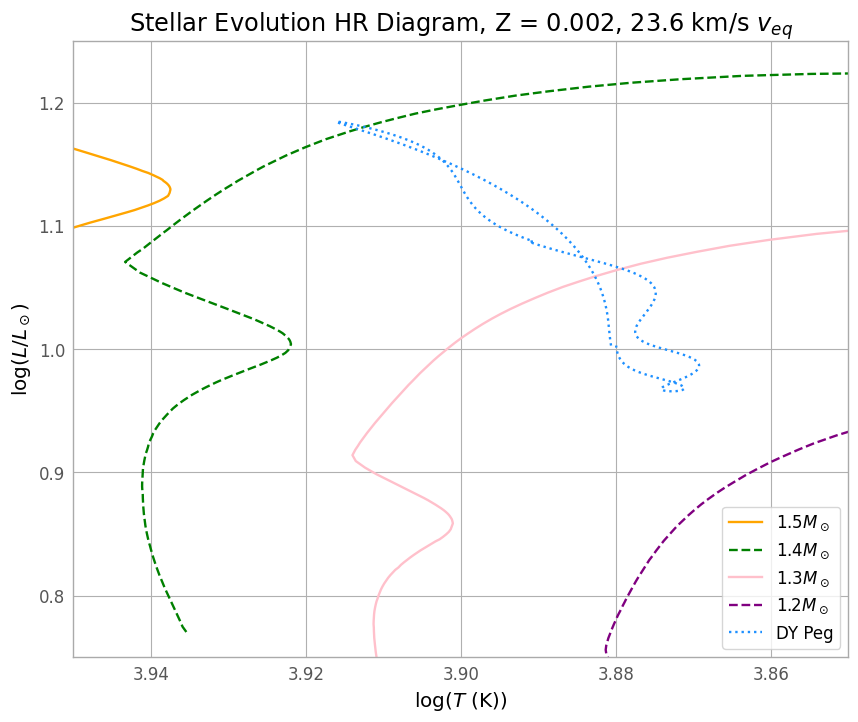

In [76]:
# plt.plot(ictemM17, icmagM17,c='red', label='$1.7 M_\odot$')
# plt.plot(ictemM16, icmagM16,c='orange', label='$1.6 M_\odot$')
plt.plot(ictemM15, icmagM15,c='orange', label='$1.5 M_\odot$')
plt.plot(ictemM14, icmagM14,c='green', linestyle='dashed', label='$1.4 M_\odot$')
plt.plot(ictemM13, icmagM13,c='pink', label='$1.3 M_\odot$')
plt.plot(ictemM12, icmagM12,c='purple', linestyle='dashed', label='$1.2M_\odot$')
# plt.plot(ictemM11, icmagM11,c='pink', label='$1.1M_\odot$')

plt.plot(np.log10(DYPegTemp), np.log10(10**((1/100**(1/5))*(4.73 - (y_thV - (np.mean(y_thV) - absMagBoll))))) ,c='dodgerblue', linestyle='dotted', label='DY Peg')

plt.legend(loc='best')
plt.xlabel('log($T$ (K))')
plt.ylabel('log($L/L_\odot$)')
plt.title('Stellar Evolution HR Diagram, Z = 0.002, 23.6 km/s $v_{eq}$');
# plt.gca().set_facecolor('black')
plt.gca().invert_xaxis()
plt.xlim(3.95,3.85)
plt.ylim(0.75, 1.25);

# save figure
plt.savefig('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis/hrdiagram_veq23.6_zoomin.png')

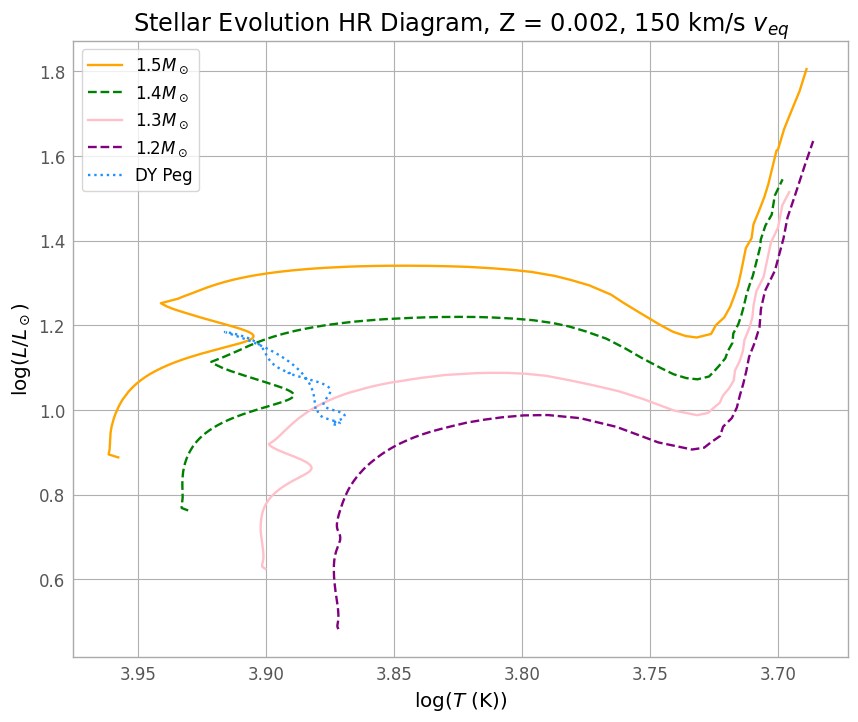

In [77]:
# plt.plot(ictemMR17, icmagMR17,c='red', label='$1.7 M_\odot$')
# plt.plot(ictemMR16, icmagMR16,c='orange', label='$1.6 M_\odot$')
plt.plot(ictemMR15, icmagMR15,c='orange', label='$1.5 M_\odot$')
plt.plot(ictemMR14, icmagMR14,c='green', linestyle='dashed', label='$1.4 M_\odot$')
plt.plot(ictemMR13, icmagMR13,c='pink', label='$1.3 M_\odot$')
plt.plot(ictemMR12, icmagMR12,c='purple', linestyle='dashed', label='$1.2M_\odot$')
# plt.plot(ictemMR11, icmagMR11,c='pink', label='$1.1M_\odot$')
plt.plot(np.log10(DYPegTemp), np.log10(10**((1/100**(1/5))*(4.73 - (y_thV - (np.mean(y_thV) - absMagBoll))))),c='dodgerblue', linestyle='dotted', label='DY Peg')

plt.legend(loc='best')
plt.xlabel('log($T$ (K))')
plt.ylabel('log($L/L_\odot$)')
plt.title('Stellar Evolution HR Diagram, Z = 0.002, 150 km/s $v_{eq}$');
# plt.gca().set_facecolor('black')
plt.gca().invert_xaxis()

# save figure
plt.savefig('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/Analysis/hrdiagram_veq150.png')

As shown by our stellar evolution diagrams, we estimate the mass of DY Pegasi. After applying the bolometric correction, we find that DY Pegasi oscillates between the $1.3 M_\odot$ and $1.4 M_\odot$ curves at metallicity $Z=0.002$ and equatorial rotational speed $v_{eq} = 23.6 \; \mathrm{km/s}$.

We review the paper https://arxiv.org/abs/2008.02542v3 (Xue 2020) which investigates the harmonics of the radial oscillation modes of DY Pegasi. It plots the log ratio of the 1st harmonic period with the 0th (fundamental) harmonic period with respect to the first harmonic period, or $\log(P_1 / P_0)$ vs $P_0$. (also referred to as a Petersen diagram) This relationship is expected to evolve over the lifetime of a star. The paper gives several Petersen evolution curves that contain our star's period harmonic values. (Fig. 5a) These evolution curves give the following combinations of parameters:

[create a table here]

These parameter combinations were found to correspond to certain Hertzsprung-Russell (H-R) diagram curves. However, none of these curves match with the observed luminosity and temperature window of DY Pegasi. Therefore, the authors hypothesize the existence of a hot companion of DY Pegasi that contributes temperature and luminosity to DY Pegasi. The authors hope that such a companion would explain the discrepancy of DY Pegasi from its predicted position on the H-R diagram.

Our photometric results of luminosity and temperature of DY Peg agree with this recent paper. However, given its calculated mass, its observed L and T are higher than expected (based on H-R diagram tracks). There should be a hot companion adding to its temperature and luminosity to bring it to its current values. Based on spectroscopy of DY Peg, the authors detect an excess of calcium, an element produced in the asymptotic giant branch of a star. Hence, the companion of DY Peg is most likely to be a white dwarf

This same paper gives us the equatorial rotational speeds $v_{eq} = 23.6 \; \mathrm{km/s}$ and $v_{eq} = 150 \; \mathrm{km/s}$.

Download APASS catalog star data here: https://www.aavso.org/download-apass-data

### Demonstration of SEP Package for Source Extraction (Appendix)

In [78]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab4_custom_proposal/Aaron Stuff Week 3-4 (FINALish)/SCIENCE!')

hdutest = fits.open("calibsci.00000000.fits")
predata = hdutest[0].data
data = predata.byteswap(inplace=True).newbyteorder()
imagehead = hdutest[0].header

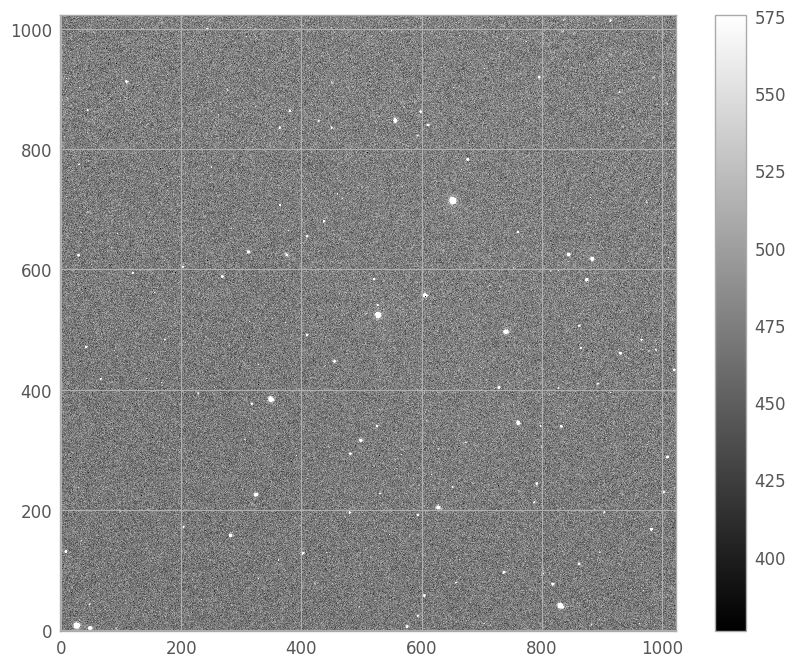

In [79]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [80]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

474.461181640625
16.567184448242188


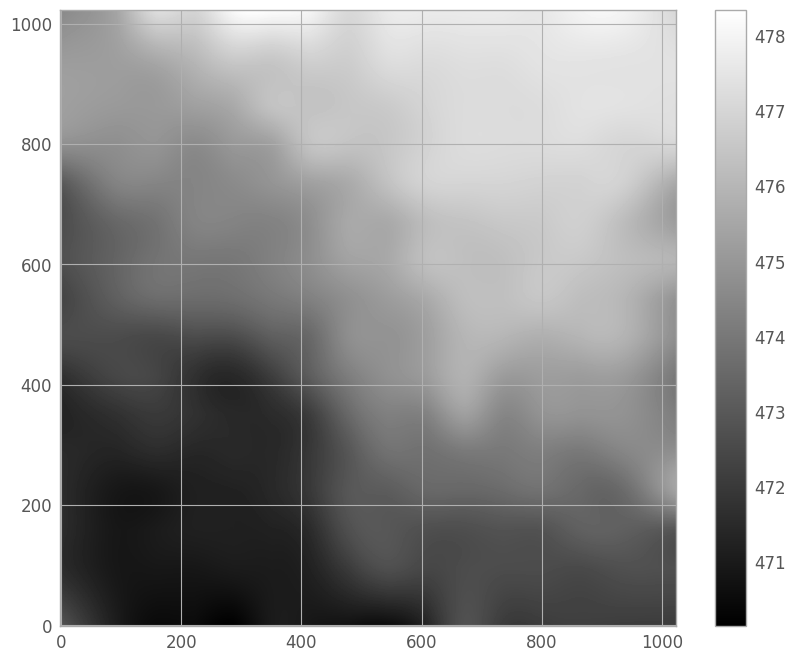

In [81]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

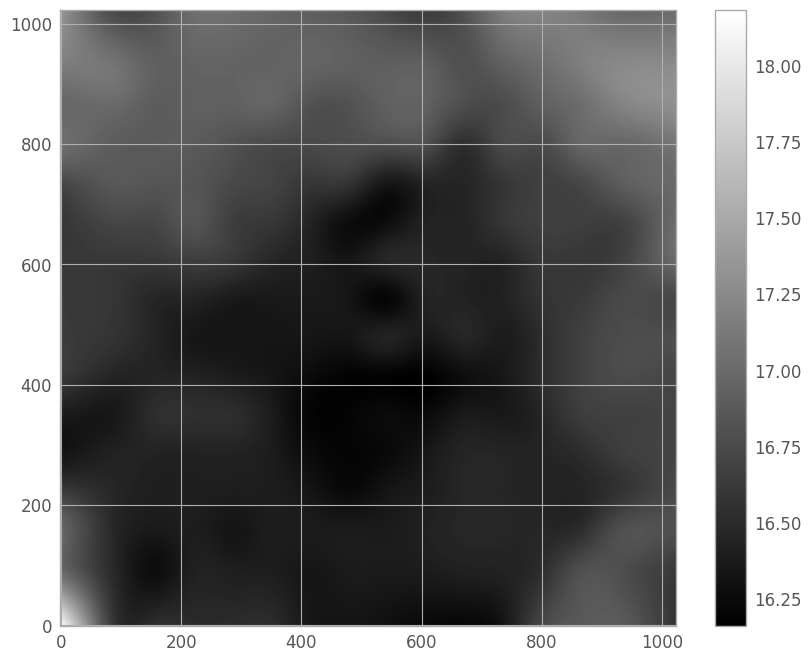

In [82]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

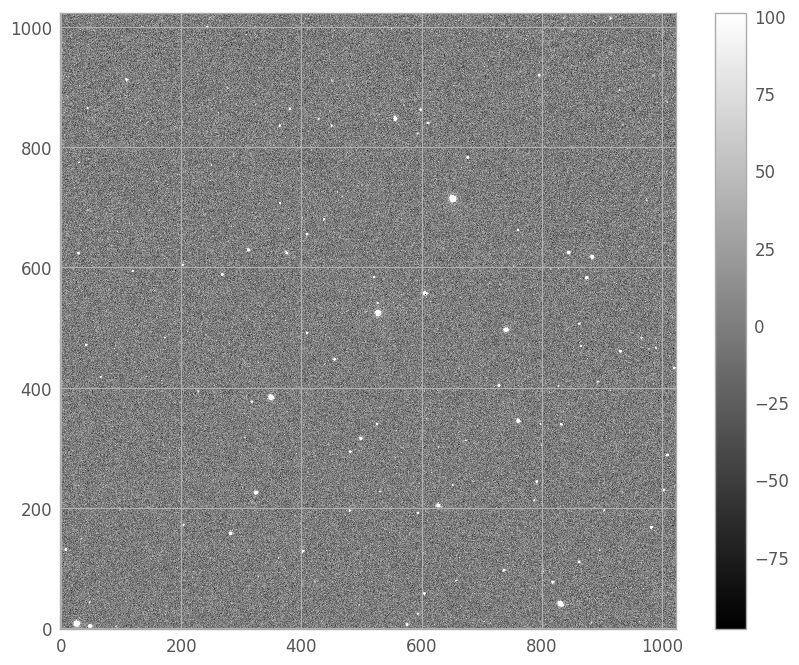

In [83]:
# subtract the background
data_sub = data - bkg

msub, ssub = np.mean(data_sub), np.std(data_sub)
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=msub-ssub, vmax=msub+ssub, origin='lower')
plt.colorbar();

In [84]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
# how many objects were detected
len(objects)

184

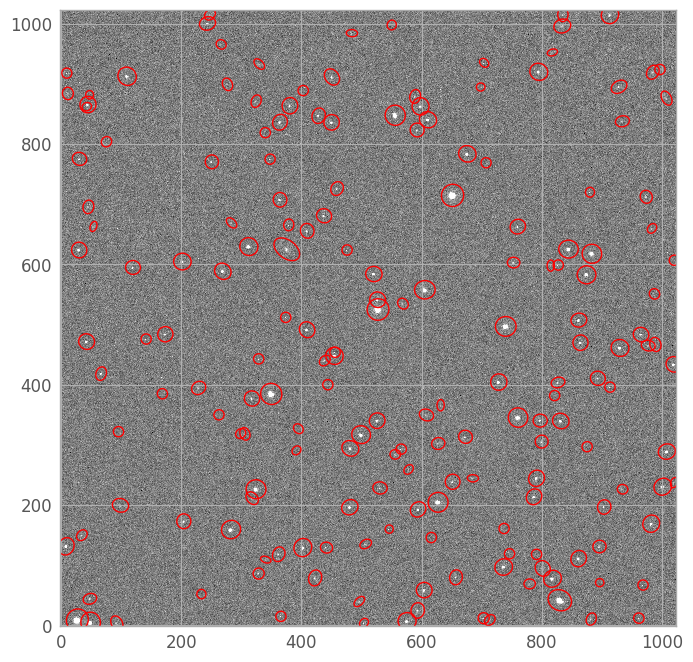

In [85]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=24*objects['a'][i],
                height=24*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [86]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     6.0, err=bkg.globalrms, gain=2.06)

In [87]:
for i in range(len(objects)):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 559.267647 +/- 167.377051
object 1: flux = 509.465247 +/- 171.260978
object 2: flux = 16868.964155 +/- 196.049959
object 3: flux = 6347.668081 +/- 184.593402
object 4: flux = 452.953514 +/- 176.703681
object 5: flux = 585.030984 +/- 177.040110
object 6: flux = 711.815739 +/- 177.151881
object 7: flux = 1053.441283 +/- 177.371913
object 8: flux = 173031.410781 +/- 339.149080
object 9: flux = 4109.647352 +/- 181.566375
object 10: flux = 1411.320842 +/- 178.138523
object 11: flux = 623.135958 +/- 176.968310
object 12: flux = 720.320854 +/- 177.101552
object 13: flux = 118050.986365 +/- 297.244899
object 14: flux = 242.454099 +/- 176.538727
object 15: flux = 2512.605855 +/- 179.632786
object 16: flux = 629.962092 +/- 177.008687
object 17: flux = 667.707784 +/- 177.308289
object 18: flux = 370.877217 +/- 176.684138
object 19: flux = 7597.211317 +/- 186.435379
object 20: flux = 1132.500886 +/- 177.789096
object 21: flux = 1293.932769 +/- 177.793351
object 22: flux = 774.4650

### Additional Testing and Broken Code

In [88]:
x, y = 512.5-1, 512.5-1

mywcs = WCS(imagehead)
print(mywcs)
ra, dec = mywcs.all_pix2world([[x, y]], 0)[0]
print(ra, dec)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 347.2105629341  17.22362067079  
CRPIX : 512.5  512.5  
CD1_1 CD1_2  : -0.0001493345972466  0.0003877197436225  
CD2_1 CD2_2  : -0.0003877362364805  -0.0001494567666752  
NAXIS : 1024  1024
347.2105629341 17.223620670789998


In [89]:
imagehead2 = hdutest[0].header

t = Time(imagehead2[10], format='isot', scale='utc')

t.mjd

59873.986383842595

In [90]:
PIPS.__version__

'0.3-beta.3'

In [91]:
# multi-period detection
DYPegperiod,DYPegspectrum = DYPegV.amplitude_spectrum(p_min=0.1,p_max=0.9,N=3,multiprocessing=False)

plt.figure(figsize=(10,3))
plt.plot(DYPegperiod,DYPegspectrum)
plt.xlim(0.1,0.9)
plt.xlabel('period (d)')
plt.ylabel('amplitude (mag)')
plt.show()

UnboundLocalError: local variable 'popt' referenced before assignment